In [451]:
import pandas as pd

In [452]:
traces_data= pd.read_csv("/Users/tridhatri/Desktop/intern@crrao/notebook/dataset/mainSimulationAccessTraces.csv")

In [453]:
traces_data.head(100)

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,lightcontrol12,/agent12/lightcontrol12,/lightControler,Entrance,/agent12/movement12,/movementSensor,Entrance,/agent12/movement12/movement,/derived/boolean,read,0,1520031775971,normal
96,tempin6,/agent6/tempin6,/sensorService,Bathroom,/agent6/tempin6,/sensorService,Bathroom,/agent6/tempin6,/sensorService,write,19.6966,1520031778626,normal
97,tempin4,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,write,19.6209,1520031778646,normal
98,tempin14,/agent14/tempin14,/sensorService,Showerroom,/agent14/tempin14,/sensorService,Showerroom,/agent14/tempin14,/sensorService,registerService,none,1520031781629,normal


In [454]:
traces_data.normality.unique()

array(['normal', 'anomalous(scan)', 'anomalous(malitiousOperation)',
       'anomalous(DoSattack)', 'anomalous(spying)',
       'anomalous(dataProbing)', 'anomalous(wrongSetUp)',
       'anomalous(malitiousControl)'], dtype=object)

In [455]:
# Get the count of missing values in 'Accesed node type' and 'Value'
missing_accesed_node_type = traces_data['accessedNodeType'].isnull().sum()
missing_value = traces_data['value'].isnull().sum()

print(f"Missing values in 'Accesed node type': {missing_accesed_node_type}")
print(f"Missing values in 'Value': {missing_value}")

Missing values in 'Accesed node type': 148
Missing values in 'Value': 2050


In [456]:
# Take a random sample of 50,000 rows
#sampled_data = traces_data.sample(n=50000, random_state=1)
import numpy as np

idx=np.random.randint(0,350000,50000)
sampled_data=traces_data.loc[idx]



## Handle Missing Values

In [457]:
sampled_data.isna().sum()

sourceID                       0
sourceAddress                  0
sourceType                     0
sourceLocation                 0
destinationServiceAddress      0
destinationServiceType         0
destinationLocation            0
accessedNodeAddress            0
accessedNodeType              23
operation                      0
value                        291
timestamp                      0
normality                      0
dtype: int64

In [458]:
sampled_data.accessedNodeType.value_counts()

accessedNodeType
/sensorService      17959
/derived/boolean    13340
/basic/number       12554
/basic/text          6062
/thermostat            31
/basic/composed        14
/lightControler         8
/washingService         3
/movementSensor         3
/batteryService         1
/smartPhone             1
/doorLockService        1
Name: count, dtype: int64

In [459]:
# Get the count of missing values in 'Accesed node type' and 'Value'
missing_accesed_node_type = sampled_data['accessedNodeType'].isnull().sum()
missing_value = sampled_data['value'].isnull().sum()

print(f"Missing values in 'Accesed node type': {missing_accesed_node_type}")
print(f"Missing values in 'Value': {missing_value}")

Missing values in 'Accesed node type': 23
Missing values in 'Value': 291


In [460]:
# Replace missing values in 'accessedNodeType' with 'malicious'
sampled_data['accessedNodeType'].fillna('malicious', inplace=True)

# Verify the replacement
print(sampled_data['accessedNodeType'].isnull().sum())  # This should print 0

# Save the cleaned data to a new CSV file if needed
sampled_data.to_csv('cleaned_sampled_data.csv', index=False)

# Print the first few rows to verify the changes
print(sampled_data.head())

0


/var/folders/gt/4b4y5qgn4cx7h6s1nwxzf4hw0000gn/T/ipykernel_36545/1278950077.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





               sourceID            sourceAddress       sourceType  \
220812  washingmachine1  /agent6/washingmachine1  /washingService   
119229          tempin2          /agent2/tempin2   /sensorService   
202519         tempin13        /agent13/tempin13   /sensorService   
186462   lightcontrol20  /agent20/lightcontrol20  /lightControler   
66313          battery5        /agent12/battery5  /batteryService   

        sourceLocation destinationServiceAddress destinationServiceType  \
220812        Bathroom          /agent5/battery1        /batteryService   
119229  BedroomParents           /agent2/tempin2         /sensorService   
202519         Bedroom         /agent13/tempin13         /sensorService   
186462          room_1         /agent20/tempin20         /sensorService   
66313         Entrance         /agent12/battery5        /batteryService   

       destinationLocation         accessedNodeAddress accessedNodeType  \
220812              Garage     /agent5/battery1/charge    /

In [461]:
# Define the mapping dictionary
value_mapping = {
    'True': 1.0,
    'False': -1.0,
    'Twenty': 20.0,
    'Null': 0.0  # Assuming 'Null' should map to 0.0
}

# Apply the mapping only to non-numeric values in the 'value' column
sampled_data['value'] = sampled_data['value'].apply(lambda x: value_mapping[x] if x in value_mapping else x)

# Convert the 'value' column to numeric (coerce errors to NaN)
sampled_data['value'] = pd.to_numeric(sampled_data['value'], errors='coerce')

# Print the first few rows to verify the conversion
print(sampled_data.head())

               sourceID            sourceAddress       sourceType  \
220812  washingmachine1  /agent6/washingmachine1  /washingService   
119229          tempin2          /agent2/tempin2   /sensorService   
202519         tempin13        /agent13/tempin13   /sensorService   
186462   lightcontrol20  /agent20/lightcontrol20  /lightControler   
66313          battery5        /agent12/battery5  /batteryService   

        sourceLocation destinationServiceAddress destinationServiceType  \
220812        Bathroom          /agent5/battery1        /batteryService   
119229  BedroomParents           /agent2/tempin2         /sensorService   
202519         Bedroom         /agent13/tempin13         /sensorService   
186462          room_1         /agent20/tempin20         /sensorService   
66313         Entrance         /agent12/battery5        /batteryService   

       destinationLocation         accessedNodeAddress accessedNodeType  \
220812              Garage     /agent5/battery1/charge    /

In [462]:
# Check the data type of the 'value' column
value_column_dtype = sampled_data['value'].dtype

# Print the data type and check if it's object (indicating strings)
print(f"Data type of 'value' column: {value_column_dtype}")

Data type of 'value' column: float64


In [463]:
sampled_data.isna().sum()

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType                0
operation                       0
value                        6123
timestamp                       0
normality                       0
dtype: int64

## Dealing with Normality column

In [464]:
# Count occurrences of each unique value in 'normality' column
normality_counts = sampled_data['normality'].value_counts()

# Calculate percentages
normality_percentages = (normality_counts / len(sampled_data)) * 100

# Combine counts and percentages into a DataFrame for display
normality_summary = pd.DataFrame({'Count': normality_counts, 'Percentage': normality_percentages})

# Display the summary
print("Value counts and percentages of 'normality' column:")
print(normality_summary)

Value counts and percentages of 'normality' column:
                               Count  Percentage
normality                                       
normal                         48594      97.188
anomalous(DoSattack)             815       1.630
anomalous(scan)                  212       0.424
anomalous(malitiousControl)      118       0.236
anomalous(malitiousOperation)    100       0.200
anomalous(spying)                 83       0.166
anomalous(dataProbing)            60       0.120
anomalous(wrongSetUp)             18       0.036


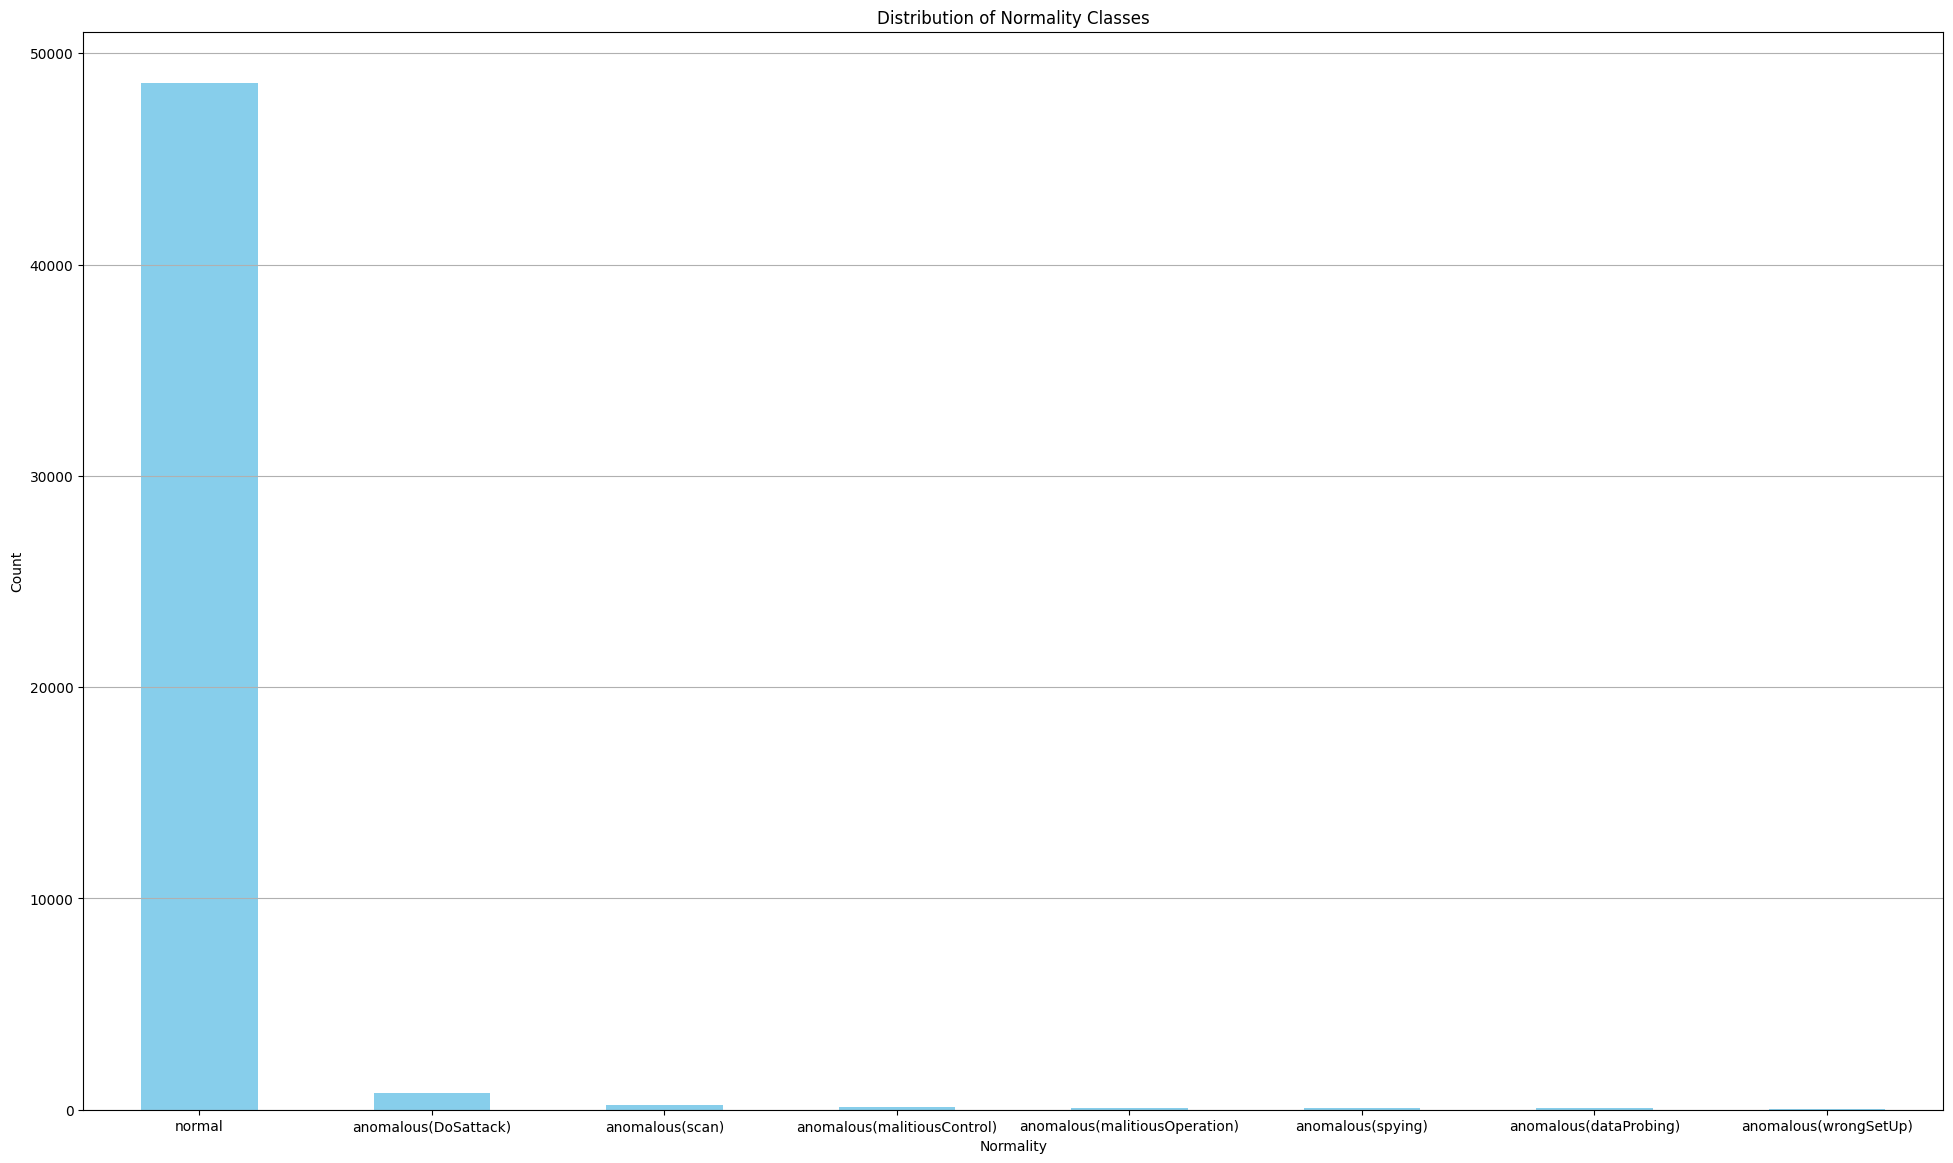

In [465]:
import matplotlib.pyplot as plt

# Example: Plotting value counts of 'normality' column
plt.figure(figsize=(24, 14))
sampled_data['normality'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Normality Classes')
plt.xlabel('Normality')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


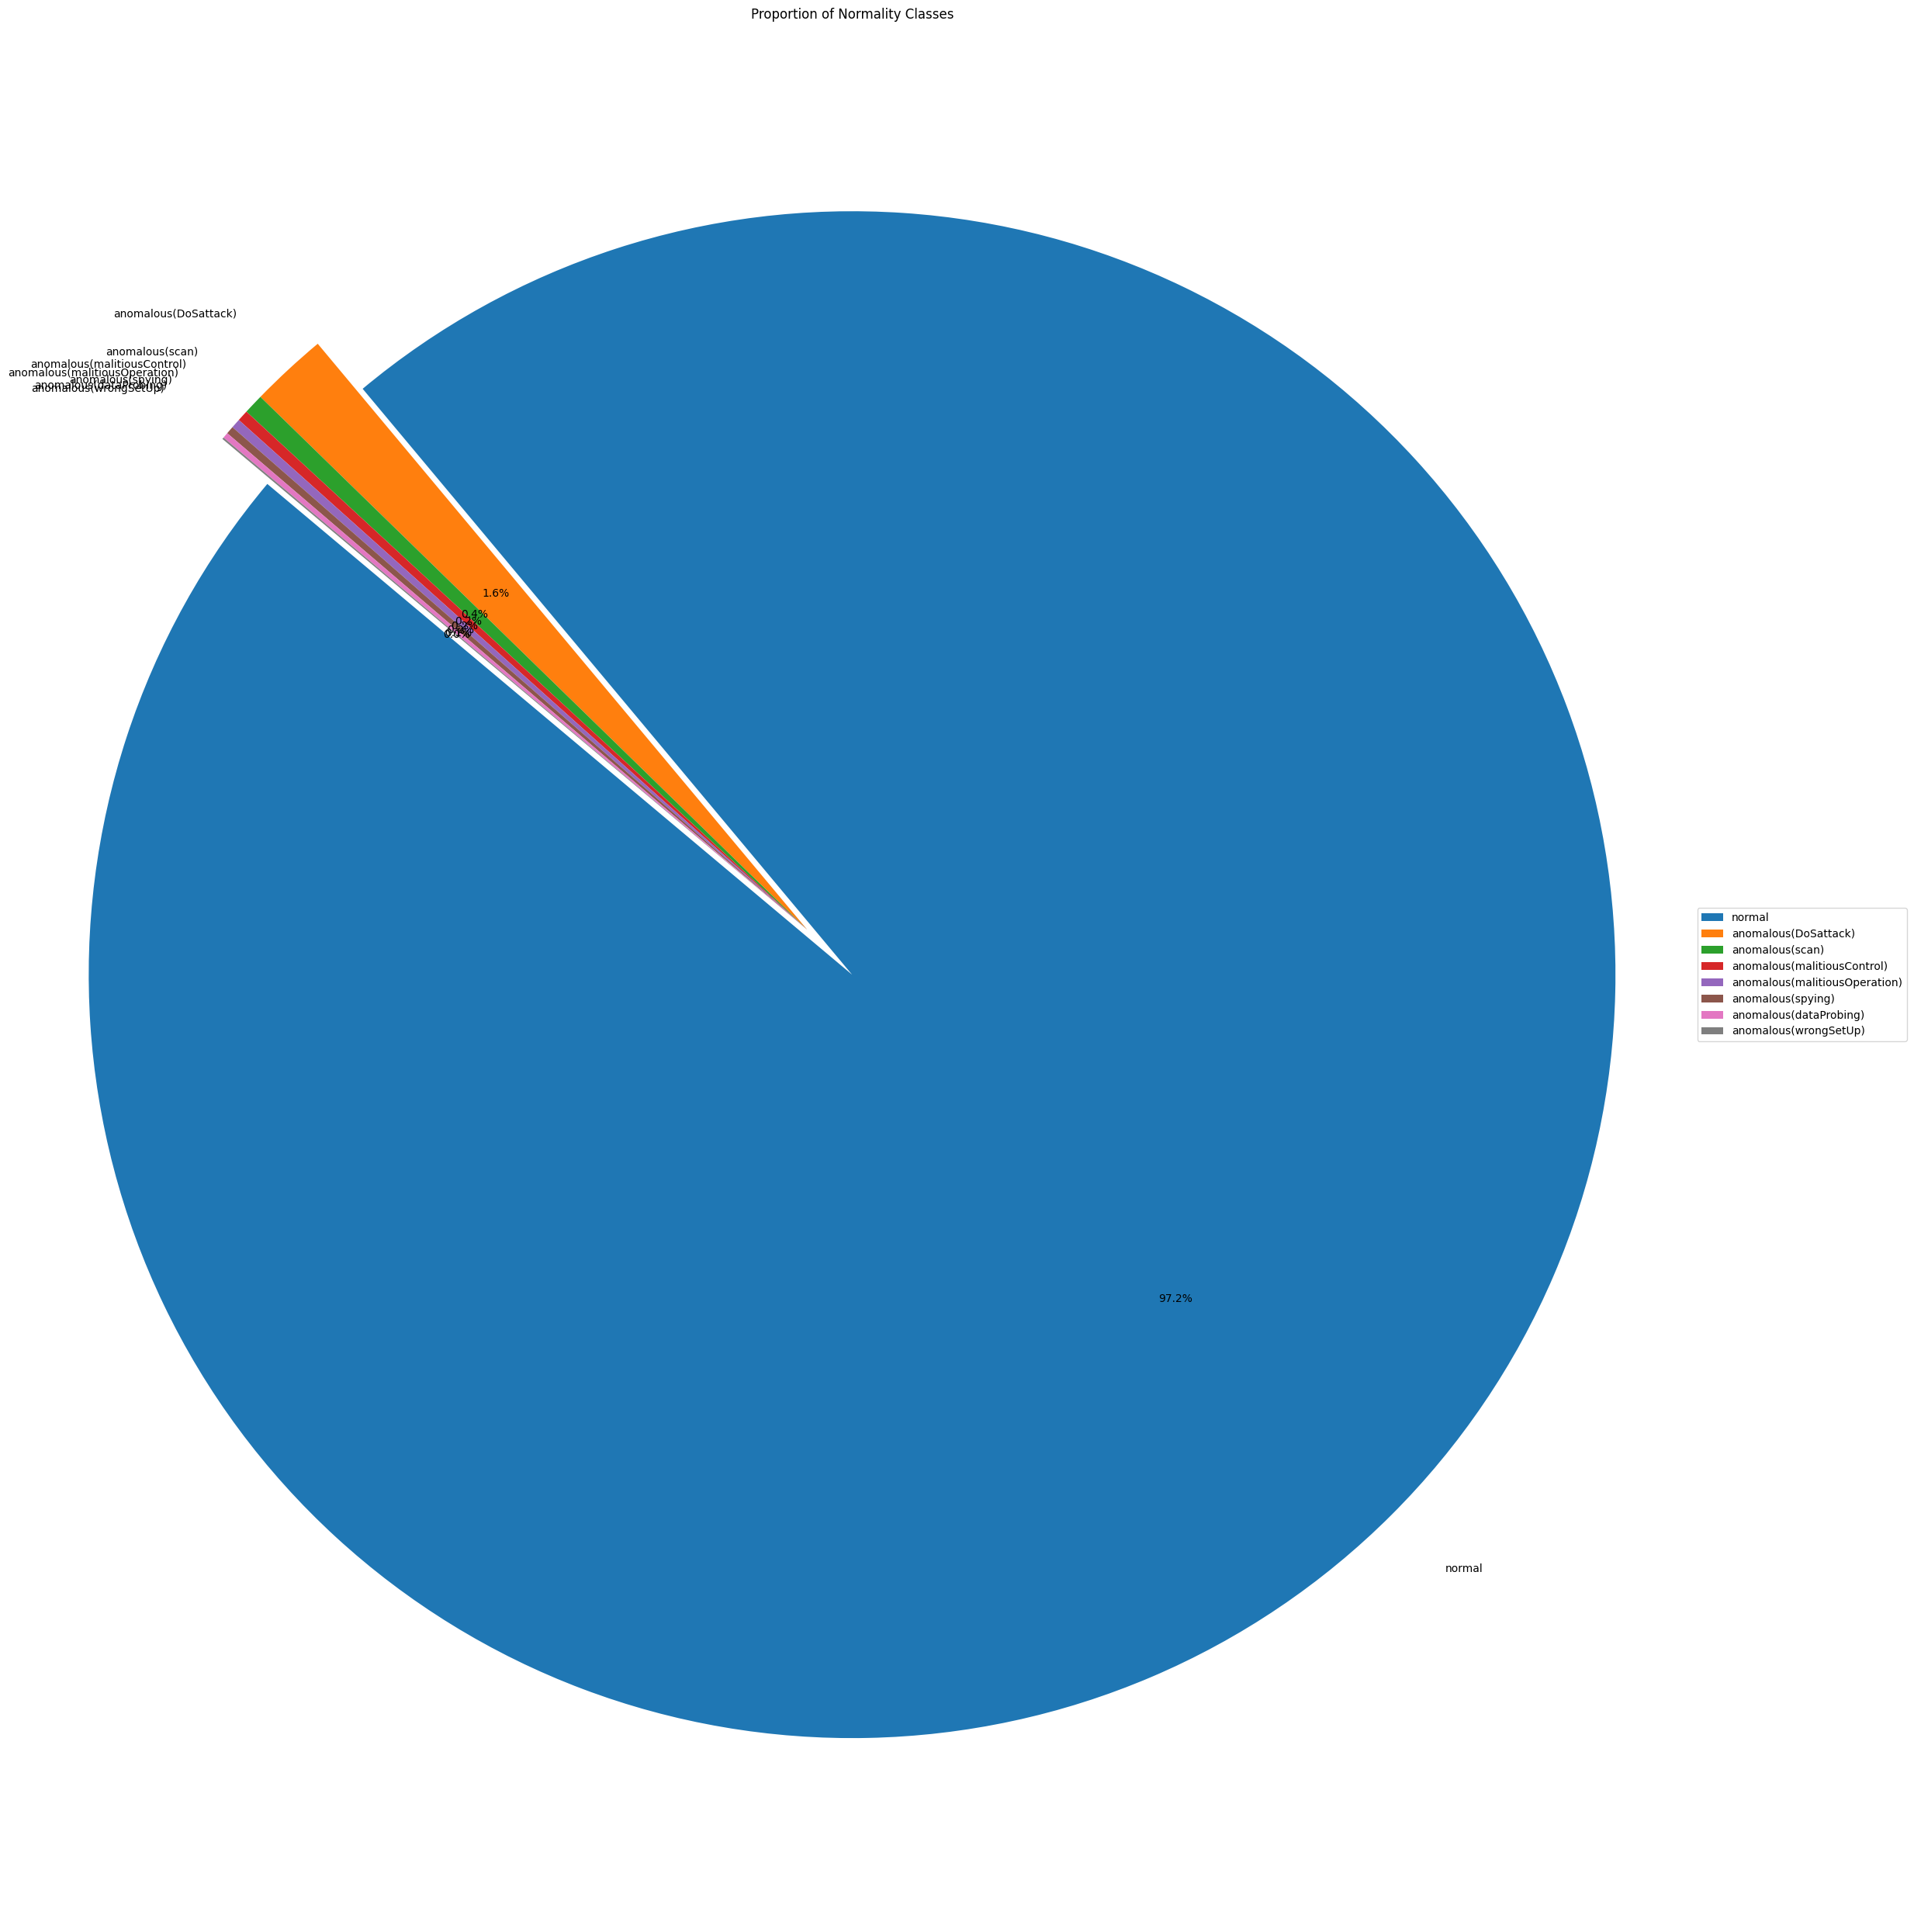

In [466]:
# Calculate value counts of 'normality' column
normality_counts = sampled_data['normality'].value_counts()

# Define explode values to emphasize certain slices
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)  # Adjust as needed

# Plotting pie chart of 'normality' column with larger slices and legends beside the chart
plt.figure(figsize=(25, 25))
plt.pie(normality_counts, labels=normality_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, radius=1.2)
plt.title('Proportion of Normality Classes')
plt.axis('equal')

# Adding legends beside the pie chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.tight_layout()
plt.show()

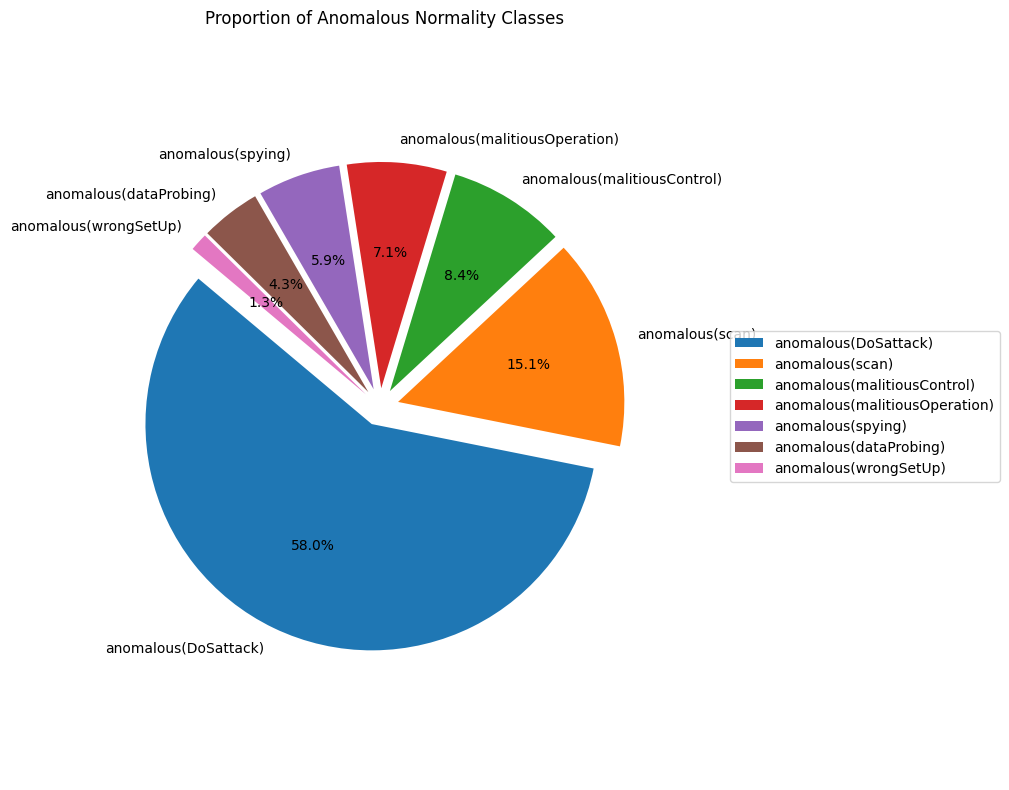

In [467]:
# Filter out 'normal' class
anomalous_data = sampled_data[sampled_data['normality'] != 'normal']

# Calculate value counts of 'normality' column excluding 'normal'
anomalous_counts = anomalous_data['normality'].value_counts()

# Define explode values to emphasize certain slices (optional)
explode = (0.1,) * len(anomalous_counts)  # Adjust as needed

# Plotting pie chart of 'normality' column excluding 'normal' with larger slices and legends beside the chart
plt.figure(figsize=(10, 8))
plt.pie(anomalous_counts, labels=anomalous_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, radius=1.2)
plt.title('Proportion of Anomalous Normality Classes')
plt.axis('equal')

# Adding legends beside the pie chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.tight_layout()
plt.show()

In [468]:
# Calculate value counts of 'normality' column
normality_counts = sampled_data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

Percentages of values in the 'normality' column:
normal: 97.188%
anomalous(DoSattack): 1.630%
anomalous(scan): 0.424%
anomalous(malitiousControl): 0.236%
anomalous(malitiousOperation): 0.200%
anomalous(spying): 0.166%
anomalous(dataProbing): 0.120%
anomalous(wrongSetUp): 0.036%


## Bar Chart of Anomalous Values

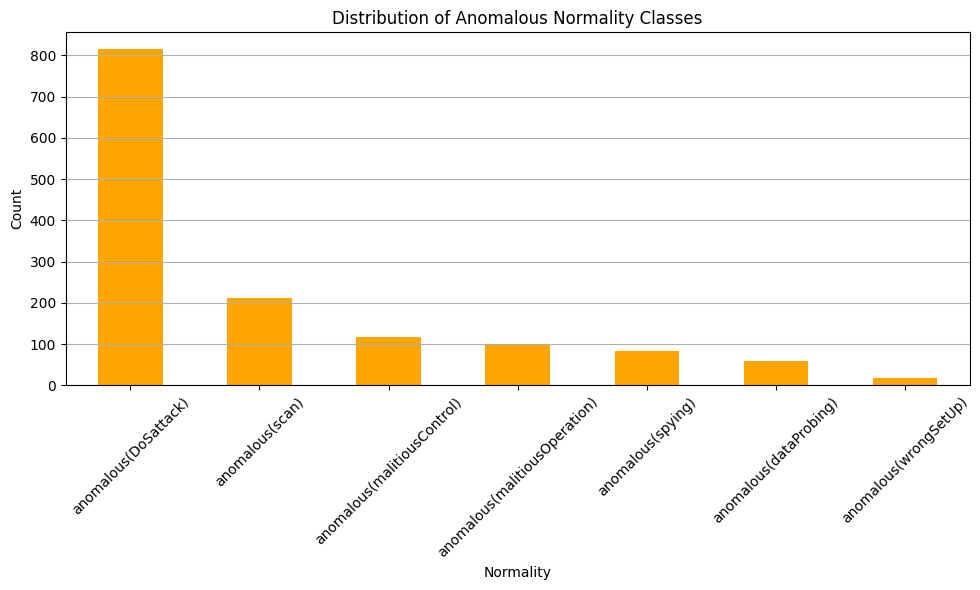

In [469]:
import matplotlib.pyplot as plt


# Filter out 'normal' category
anomalous_data = sampled_data[sampled_data['normality'] != 'normal']

# Calculate value counts of 'normality' column for anomalous values
anomalous_counts = anomalous_data['normality'].value_counts()

# Plotting bar chart of anomalous values
plt.figure(figsize=(10, 6))
anomalous_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Anomalous Normality Classes')
plt.xlabel('Normality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


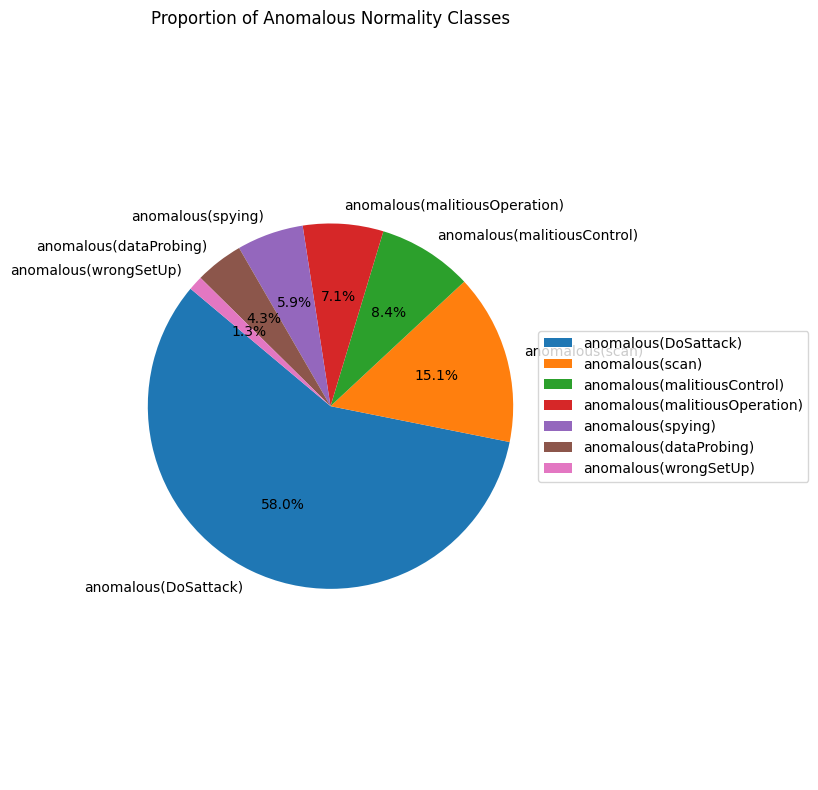

In [470]:
# Plotting pie chart of anomalous values
plt.figure(figsize=(8, 8))
plt.pie(anomalous_counts, labels=anomalous_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Anomalous Normality Classes')
plt.axis('equal')

# Adding legends beside the pie chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.tight_layout()
plt.show()

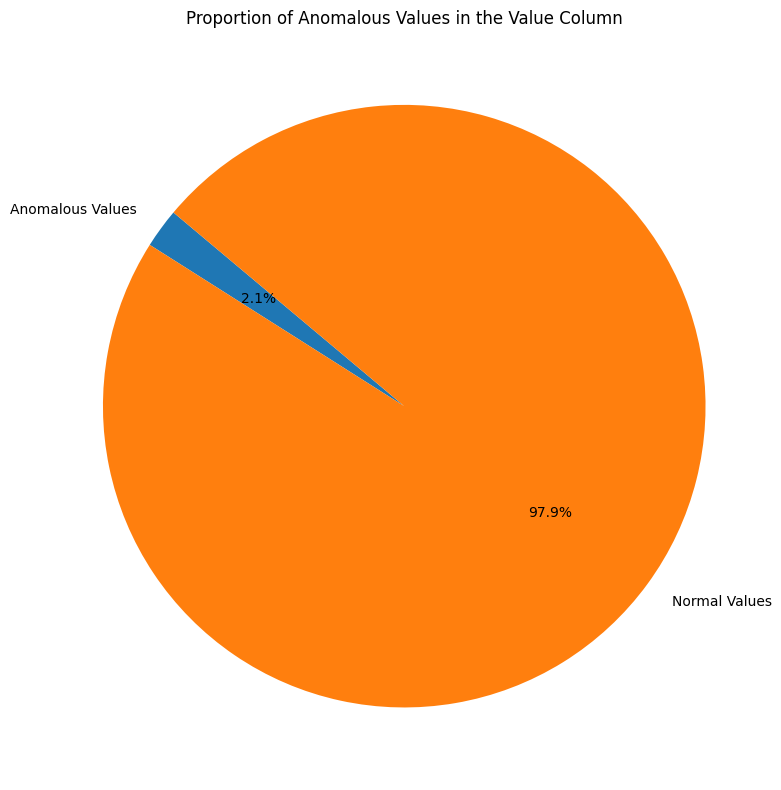

In [471]:
# Filter out rows with anomalous values based on 'normality' column
anomalous_values = sampled_data[sampled_data['normality'] != 'normal']['value']

# Calculate total count of 'value' column
total_values = sampled_data['value']

# Calculate proportions of anomalous values relative to total values
anomalous_percentage = (anomalous_values.count() / total_values.count()) * 100

# Plotting pie chart of anomalous values relative to total values
plt.figure(figsize=(8, 8))
plt.pie([anomalous_percentage, 100 - anomalous_percentage], labels=['Anomalous Values', 'Normal Values'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Anomalous Values in the Value Column')
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()

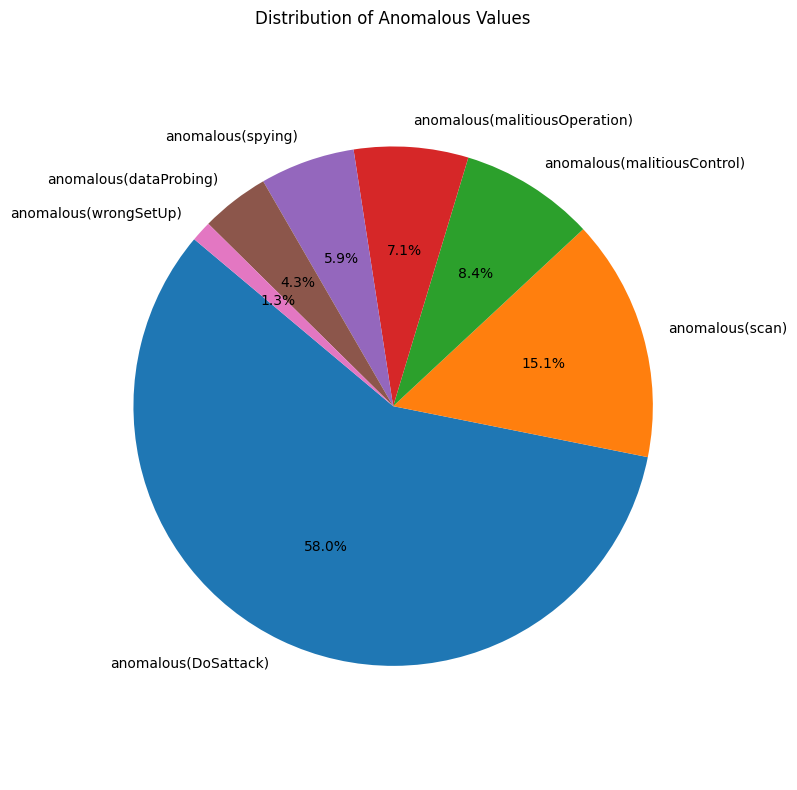

In [472]:
# Filter out rows with anomalous values based on 'normality' column
anomalous_data = sampled_data[sampled_data['normality'] != 'normal']

# Calculate total count of 'value' column
total_values_count = sampled_data['value'].count()

# Calculate count of anomalous values
anomalous_values_count = anomalous_data['value'].count()

# Calculate percentages of each type of anomaly relative to total 'value' column
anomaly_counts = anomalous_data['normality'].value_counts()
anomaly_percentages = anomaly_counts / total_values_count * 100

# Plotting pie chart of distribution of anomalous values
plt.figure(figsize=(8, 8))
plt.pie(anomaly_percentages, labels=anomaly_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Anomalous Values')
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()

## Populating the missing values with mode value

In [473]:
import pandas as pd

# # Assuming 'sampled_data' is your DataFrame
# # Identify columns with missing values
# columns_with_missing = sampled_data.columns[sampled_data.isnull().any()]

# # Calculate mode for each column
# modes = sampled_data[columns_with_missing].mode().iloc[0]

# # Fill missing values with mode values
# sampled_data = sampled_data.fillna(modes)

# Verify if missing values are filled
#sampled_data=sampled_data.drop('value',axis=1)
sampled_data.columns
#print(sampled_data.isnull().sum())


Index(['sourceID', 'sourceAddress', 'sourceType', 'sourceLocation',
       'destinationServiceAddress', 'destinationServiceType',
       'destinationLocation', 'accessedNodeAddress', 'accessedNodeType',
       'operation', 'value', 'timestamp', 'normality'],
      dtype='object')

## LABEL ENCODING


In [474]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Assuming 'target_variable' is your target column name
target_variable = 'normality'

# Encode categorical target variable into numerical format (if needed)

for col in sampled_data.columns:
    le = LabelEncoder()
    sampled_data[col] = le.fit_transform(sampled_data[col])
    

sampled_data.head()


,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
220812,81,87,7,0,72,0,6,105,1,1,6,29125,7
119229,66,33,4,3,30,4,3,45,8,3,7007,15778,7
202519,64,22,4,1,23,4,1,34,8,3,7243,26741,7
186462,22,35,2,11,34,4,11,51,8,1,5157,24715,7
66313,4,14,0,5,15,0,5,23,2,1,8037,8673,7


## Checking the classes after encoding

In [475]:
import pandas as pd

# Assuming sampled_data is already encoded
encoded_normality = sampled_data['normality']

# Get the unique values from the encoded normality column
unique_encoded_values = encoded_normality.unique()

# Print the unique encoded values
print("Unique encoded values in 'normality' column:")
print(unique_encoded_values)

# Original value counts before encoding
original_value_counts = {
    'normal': 97.342,
    'anomalous(DoSattack)': 1.560,
    'anomalous(scan)': 0.372,
    'anomalous(malitiousControl)': 0.216,
    'anomalous(malitiousOperation)': 0.198,
    'anomalous(spying)': 0.172,
    'anomalous(dataProbing)': 0.112,
    'anomalous(wrongSetUp)': 0.028
}

# Create a dictionary to store the mapping
mapping = {}

# Iterate over the unique encoded values and map them to the original labels
for encoded_value in unique_encoded_values:
    # Get the percentage of the encoded value
    percentage = (encoded_normality == encoded_value).mean() * 100

    # Find the closest matching original label
    closest_label = min(original_value_counts.keys(), key=lambda k: abs(original_value_counts[k] - percentage))

    # Store the mapping
    mapping[encoded_value] = closest_label

# Print the mapping
print("\nMapping of encoded values to original labels:")
for encoded_value, original_label in mapping.items():
    print(f"{encoded_value}: {original_label}")


Unique encoded values in 'normality' column:
[7 0 4 2 5 3 6 1]

Mapping of encoded values to original labels:
7: normal
0: anomalous(DoSattack)
4: anomalous(scan)
2: anomalous(malitiousControl)
5: anomalous(spying)
3: anomalous(malitiousOperation)
6: anomalous(wrongSetUp)
1: anomalous(dataProbing)


## CORRELATIONS

In [476]:
import pandas as pd

# Assuming 'sampled_data' is your DataFrame
# Select only numeric columns
numeric_columns = sampled_data.select_dtypes(include=['int', 'float']).columns

# Calculate correlations for numeric columns
correlation_matrix = sampled_data[numeric_columns].corr()

# Print correlation matrix
print(correlation_matrix)


                           sourceID  sourceAddress  sourceType  \
sourceID                   1.000000       0.144227    0.896760   
sourceAddress              0.144227       1.000000    0.041870   
sourceType                 0.896760       0.041870    1.000000   
sourceLocation             0.082954      -0.034110   -0.015917   
destinationServiceAddress  0.071823       0.986432   -0.035451   
destinationServiceType     0.217700       0.017159    0.114429   
destinationLocation        0.114260       0.070049    0.021400   
accessedNodeAddress        0.071345       0.986042   -0.034935   
accessedNodeType           0.332523       0.055787    0.160668   
operation                  0.562408       0.042179    0.333531   
value                      0.167423       0.024524    0.113602   
timestamp                 -0.035188       0.013758   -0.008939   
normality                  0.075919       0.074880   -0.119596   

                           sourceLocation  destinationServiceAddress  \
sou

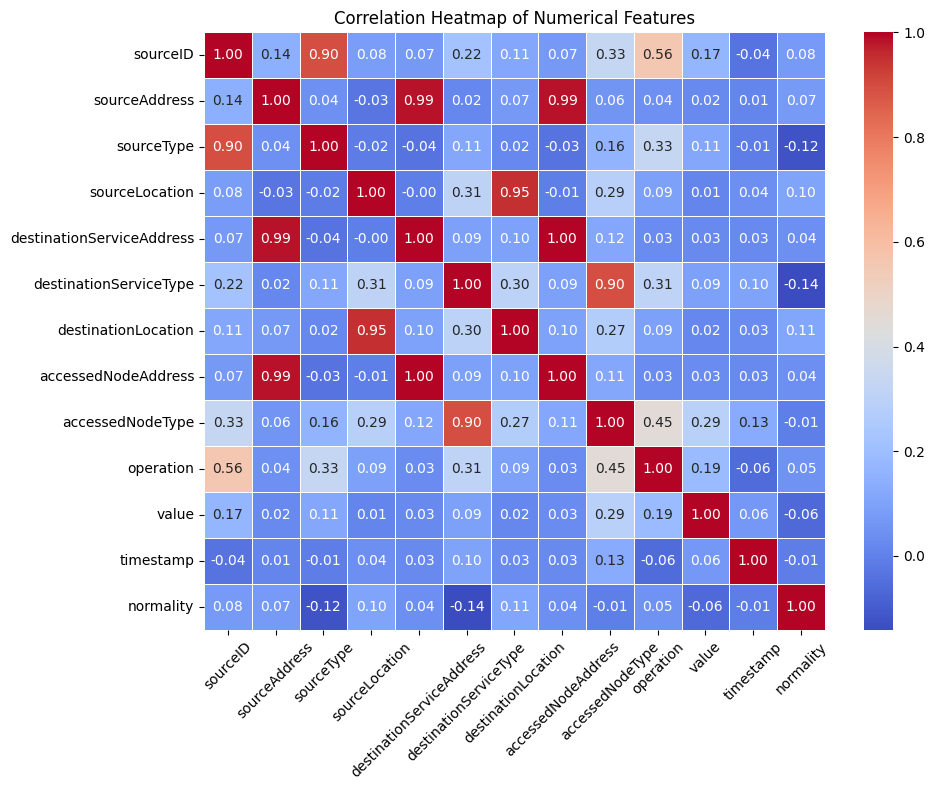

In [477]:
# Select numeric columns
numeric_columns = sampled_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Plotting heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [478]:
sampled_data=sampled_data.drop(['sourceAddress','accessedNodeAddress','destinationServiceAddress'],axis=1)
sampled_data.head()

,sourceID,sourceType,sourceLocation,destinationServiceType,destinationLocation,accessedNodeType,operation,value,timestamp,normality
220812,81,7,0,0,6,1,1,6,29125,7
119229,66,4,3,4,3,8,3,7007,15778,7
202519,64,4,1,4,1,8,3,7243,26741,7
186462,22,2,11,4,11,8,1,5157,24715,7
66313,4,0,5,0,5,2,1,8037,8673,7


## EXPORT THE current state if sampled_data into cleaned_data

In [479]:
# Assuming 'sampled_data' is your DataFrame

sampled_data.to_csv('cleaned_data.csv', index=False)

## Import the cleaned-data

In [480]:
import pandas as pd
real_data = pd.read_csv("cleaned_data.csv")

In [481]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming 'target_variable' is your target column name
target_variable = 'normality'

# Convert categorical features to numeric using one-hot encoding or drop non-numeric columns
X = real_data.drop(columns=[target_variable])
y = real_data[target_variable]

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'SGD Classifier': SGDClassifier(),
    'Bagging Classifier': BaggingClassifier()
}

# Train and evaluate each model
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                    Model  Accuracy  Precision  Recall
0     Logistic Regression    0.9732   0.947118  0.9732
1             Naive Bayes    0.9741   0.980924  0.9741
2           Decision Tree    0.9995   0.999506  0.9995
3           Random Forest    0.9997   0.999700  0.9997
4                AdaBoost    0.9745   0.959758  0.9745
5       Gradient Boosting    0.9993   0.999309  0.9993
6     K-Nearest Neighbors    0.9933   0.992125  0.9933
7  Support Vector Machine    0.9732   0.947118  0.9732
8          SGD Classifier    0.9732   0.947118  0.9732
9      Bagging Classifier    0.9994   0.999409  0.9994


In [482]:
# Baseline per-class recall (no synthetic augmentation)
from sklearn.metrics import classification_report

class_names = {
    0: 'DoS Attack',
    1: 'Data Probing', 
    2: 'Malicious Control',
    3: 'Malicious Operation',
    4: 'Scan',
    5: 'Spying',
    6: 'Wrong Setup',
    7: 'Normal'
}

best_model_baseline = RandomForestClassifier(random_state=42)
best_model_baseline.fit(X_train, y_train)
y_pred_baseline = best_model_baseline.predict(X_test)

print("=== Baseline Per-Class Recall (Random Forest, no synthetic data) ===")
print(f"{'Class':<25} {'Recall':>8} {'Support':>10}")
print("-" * 45)

report_baseline = classification_report(y_test, y_pred_baseline, output_dict=True, zero_division=0)
for cls_id in sorted(class_names.keys()):
    cls_str = str(cls_id)
    if cls_str in report_baseline:
        recall = report_baseline[cls_str]['recall']
        support = int(report_baseline[cls_str]['support'])
        print(f"{class_names[cls_id]:<25} {recall:>8.4f} {support:>10}")

print("-" * 45)
print(f"{'Weighted Average':<25} {report_baseline['weighted avg']['recall']:>8.4f} {int(report_baseline['weighted avg']['support']):>10}")
print(f"{'Macro Average':<25} {report_baseline['macro avg']['recall']:>8.4f}")

=== Baseline Per-Class Recall (Random Forest, no synthetic data) ===
Class                       Recall    Support
---------------------------------------------
DoS Attack                  1.0000        153
Data Probing                1.0000         13
Malicious Control           0.9500         20
Malicious Operation         1.0000         17
Scan                        0.9600         50
Spying                      1.0000         12
Wrong Setup                 1.0000          3
Normal                      1.0000       9732
---------------------------------------------
Weighted Average            0.9997      10000
Macro Average               0.9888


In [483]:

# For suimulation purpose 
X_simulation=pd.concat([X_train,y_train],axis=1)
X_simulation.normality.value_counts()
#X_simulation.head()

normality
7    38862
0      662
4      162
2       98
3       83
5       71
1       47
6       15
Name: count, dtype: int64

## NOw LET US APPLY THE SDV MODULE ON THIS DATA FRAME

In [484]:
pip install sdv

Note: you may need to restart the kernel to use updated packages.




## extracting the Metadata from dataframes

In [485]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(X_simulation)
metadata


{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "sourceID": {
            "sdtype": "numerical"
        },
        "sourceType": {
            "sdtype": "categorical"
        },
        "sourceLocation": {
            "sdtype": "numerical"
        },
        "destinationServiceType": {
            "sdtype": "categorical"
        },
        "destinationLocation": {
            "sdtype": "numerical"
        },
        "accessedNodeType": {
            "sdtype": "numerical"
        },
        "operation": {
            "sdtype": "categorical"
        },
        "value": {
            "sdtype": "numerical"
        },
        "timestamp": {
            "sdtype": "numerical"
        },
        "normality": {
            "sdtype": "categorical"
        }
    }
}

## APPLYING GaussianCopula

In [486]:
from sdv.single_table import GaussianCopulaSynthesizer

# Generate synthetic data per minority class to reach 5000 each
synthetic_parts = []
class_counts = X_simulation[X_simulation.normality != 7].normality.value_counts()

for cls, count in class_counts.items():
    needed = max(0, 5000 - count)
    if needed > 0:
        cls_data = X_simulation[X_simulation.normality == cls]
        synth = GaussianCopulaSynthesizer(metadata)
        synth.fit(cls_data)
        synthetic_cls = synth.sample(num_rows=needed)
        synthetic_parts.append(synthetic_cls)
        print(f"Class {cls}: had {count}, generated {needed} synthetic rows")
    else:
        print(f"Class {cls}: already has {count} rows, no synthetic needed")

synthetic_data1 = pd.concat(synthetic_parts, axis=0, ignore_index=True)
print(f"\nTotal synthetic rows generated: {len(synthetic_data1)}")

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:134: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



Class 0: had 662, generated 4338 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 4: had 162, generated 4838 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 2: had 98, generated 4902 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 3: had 83, generated 4917 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 5: had 71, generated 4929 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/copulas/multivariate/gaussian.py:264: RuntimeWarning:

covariance is not symmetric positive-semidefinite.



Class 1: had 47, generated 4953 synthetic rows
Class 6: had 15, generated 4985 synthetic rows

Total synthetic rows generated: 33862


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



In [487]:
X_simulation.shape

(40000, 10)

In [488]:
# Sampling done in previous cell

In [489]:
from sdv.evaluation.single_table import evaluate_quality

quality_report1 = evaluate_quality(
    real_data,
    synthetic_data1,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 10/10 [00:00<00:00, 101.62it/s]|
Column Shapes Score: 70.04%

(2/2) Evaluating Column Pair Trends: |██████████| 45/45 [00:00<00:00, 331.75it/s]|
Column Pair Trends Score: 38.69%

Overall Score (Average): 54.36%



In [490]:
quality_report1.get_details('Column Shapes')

,Column,Metric,Score
0,sourceID,KSComplement,0.742570
1,sourceType,TVComplement,0.660804
2,sourceLocation,KSComplement,0.745504
3,destinationServiceType,TVComplement,0.639224
4,destinationLocation,KSComplement,0.869544
5,accessedNodeType,KSComplement,0.849718
6,operation,TVComplement,0.860878
7,value,KSComplement,0.804211
8,timestamp,KSComplement,0.803098
9,normality,TVComplement,0.028120


In [491]:
def calculate_statistics(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[float, int])

    mean_values = numeric_df.mean()
    median_values = numeric_df.median()
    mode_values = numeric_df.mode().iloc[0]  # mode() returns a DataFrame, so take the first row

    return mean_values, median_values, mode_values

def create_summary_table(df, dataset_name):
    mean, median, mode = calculate_statistics(df)

    summary_df = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        'Mode': mode
    })

    summary_df.index.name = dataset_name
    return summary_df



# Create summary tables for real data
summary_table_real1 = create_summary_table(X_simulation, 'real_data')


# Assuming the synthetic datasets are loaded
# Create summary tables for synthetic data
summary_table_synthetic1 = create_summary_table(synthetic_data1, 'synthetic_data1')


# Concatenate summary tables for comparison
summary_table_combined1 = pd.concat([summary_table_real1, summary_table_synthetic1], keys=['Real', 'Synthetic'])


# Display combined summary tables
print("Combined Summary Table for Dataset 1")
print(summary_table_combined1)

# print("\nCombined Summary Table for Dataset 2")
# print(summary_table_combined2)

# print("\nCombined Summary Table for Dataset 3")
# print(summary_table_combined3)

Combined Summary Table for Dataset 1
                                          Mean   Median     Mode
          real_data                                             
Real      sourceID                   38.488700     29.0     81.0
          sourceType                  2.781525      2.0      2.0
          sourceLocation              8.581975      8.0      6.0
          destinationServiceType      2.285475      3.0      0.0
          destinationLocation         8.690425      7.0      6.0
          accessedNodeType            4.452425      4.0      8.0
          operation                   1.617950      1.0      1.0
          value                    2420.994625     13.0      1.0
          timestamp               23067.255275  23099.5   2176.0
          normality                   6.840475      7.0      7.0
Synthetic sourceID                   44.601855     36.0     36.0
          sourceType                  3.857864      4.0      4.0
          sourceLocation              7.928740      5

In [492]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=X_simulation,
    synthetic_data=synthetic_data1,
    column_name='normality',
    metadata=metadata
)

fig.show()

In [493]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score




# Assuming 'target_variable' is your target column name
target_variable = 'normality'

# Encode categorical target variable into numerical format (if needed)
#le = LabelEncoder()
#real_data[target_variable] = le.fit_transform(real_data[target_variable])
#synthetic_data1[target_variable] = le.transform(synthetic_data1[target_variable])

# Convert categorical features to numeric using one-hot encoding or drop non-numeric columns
X_real = real_data.drop(columns=['normality'])
y_real = real_data[target_variable]

X_synthetic = synthetic_data1.drop(columns=[ 'normality'])
y_synthetic = synthetic_data1[target_variable]

# Split data into training and testing sets (80% training, 20% testing)
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'SGD Classifier': SGDClassifier(),
    'Bagging Classifier': BaggingClassifier()
}

# Train and evaluate on real data
model.fit(X_train_real, y_train_real)
y_pred_real = model.predict(X_test_real)
accuracy_real = accuracy_score(y_test_real, y_pred_real)
precision_real = precision_score(y_test_real, y_pred_real, average='weighted', zero_division=0)
recall_real = recall_score(y_test_real, y_pred_real, average='weighted', zero_division=0)

# Train and evaluate on synthetic data
model.fit(X_train_synthetic, y_train_synthetic)
y_pred_synthetic = model.predict(X_test_synthetic)
accuracy_synthetic = accuracy_score(y_test_synthetic, y_pred_synthetic)
precision_synthetic = precision_score(y_test_synthetic, y_pred_synthetic, average='weighted', zero_division=0)
recall_synthetic = recall_score(y_test_synthetic, y_pred_synthetic, average='weighted', zero_division=0)

# Print results in a tabular format
results = {
    'Data Type': ['Real Data', 'Synthetic Data'],
    'Accuracy': [accuracy_real, accuracy_synthetic],
    'Precision': [precision_real, precision_synthetic],
    'Recall': [recall_real, recall_synthetic]
}

results_df = pd.DataFrame(results)
print(results_df)

        Data Type  Accuracy  Precision    Recall
0       Real Data  0.999200   0.999208  0.999200
1  Synthetic Data  0.998671   0.998671  0.998671


## Concatenating the X_simulation data and the newly generated synthetic data into 'data'

In [494]:
# Smart balancing: equalize all classes to ~5000 rows each
import pandas as pd

# Downsample normal class
normal_data = X_simulation[X_simulation.normality == 7].sample(n=5000, random_state=42)

# Keep all real anomalous data
anomalous_data = X_simulation[X_simulation.normality != 7]

# Add synthetic data (anomalous only)
data = pd.concat([normal_data, anomalous_data, synthetic_data1], axis=0, ignore_index=True)

print("Class distribution after smart balancing:")
print(data.normality.value_counts().sort_index())
print(f"\nTotal rows: {len(data)}")

Class distribution after smart balancing:
normality
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
Name: count, dtype: int64

Total rows: 40000


In [495]:
# Correct evaluation: train on balanced augmented data, test on held-out real test set
# X_test and y_test come from Cell 42's train_test_split on real_data

X_aug = data.drop(columns=['normality'])
y_aug = data[target_variable]

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'SGD Classifier': SGDClassifier(),
    'Bagging Classifier': BaggingClassifier()
}

# Train and evaluate each model
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

for name, model in models.items():
    model.fit(X_aug, y_aug)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                    Model  Accuracy  Precision  Recall
0     Logistic Regression    0.1229   0.966029  0.1229
1             Naive Bayes    0.5080   0.976037  0.5080
2           Decision Tree    0.9976   0.998029  0.9976
3           Random Forest    0.9990   0.999050  0.9990
4                AdaBoost    0.5195   0.980004  0.5195
5       Gradient Boosting    0.9986   0.998692  0.9986
6     K-Nearest Neighbors    0.2883   0.974962  0.2883
7  Support Vector Machine    0.1792   0.971163  0.1792
8          SGD Classifier    0.0024   0.000031  0.0024
9      Bagging Classifier    0.9982   0.998442  0.9982


In [496]:
# Per-class recall: "What % of each attack type did we catch?"
from sklearn.metrics import classification_report
import numpy as np

class_names = {
    0: 'DoS Attack',
    1: 'Data Probing', 
    2: 'Malicious Control',
    3: 'Malicious Operation',
    4: 'Scan',
    5: 'Spying',
    6: 'Wrong Setup',
    7: 'Normal'
}

# Use the best model from results (Random Forest)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_aug, y_aug)
y_pred_best = best_model.predict(X_test)

# Per-class recall
print("=== Per-Class Recall (Random Forest) ===")
print(f"{'Class':<25} {'Recall':>8} {'Support':>10}")
print("-" * 45)

report = classification_report(y_test, y_pred_best, output_dict=True, zero_division=0)
for cls_id in sorted(class_names.keys()):
    cls_str = str(cls_id)
    if cls_str in report:
        recall = report[cls_str]['recall']
        support = int(report[cls_str]['support'])
        print(f"{class_names[cls_id]:<25} {recall:>8.4f} {support:>10}")

print("-" * 45)
print(f"{'Weighted Average':<25} {report['weighted avg']['recall']:>8.4f} {int(report['weighted avg']['support']):>10}")
print(f"{'Macro Average':<25} {report['macro avg']['recall']:>8.4f}")

=== Per-Class Recall (Random Forest) ===
Class                       Recall    Support
---------------------------------------------
DoS Attack                  1.0000        153
Data Probing                1.0000         13
Malicious Control           0.9500         20
Malicious Operation         1.0000         17
Scan                        0.9800         50
Spying                      1.0000         12
Wrong Setup                 1.0000          3
Normal                      0.9989       9732
---------------------------------------------
Weighted Average            0.9987      10000
Macro Average               0.9911


In [497]:
y_real

0        7
1        7
2        7
3        7
4        7
        ..
49995    7
49996    7
49997    7
49998    7
49999    7
Name: normality, Length: 50000, dtype: int64

## Unique encoded values in 'normality' column:
[7 0 3 5 1 4 2 6]

Mapping of encoded values to original labels:

7: normal 

0: anomalous(DoSattack) 

3: anomalous(malitiousOperation) 

5: anomalous(spying)

1: anomalous(dataProbing)

4: anomalous(scan)

2: anomalous(malitiousControl)

6: anomalous(wrongSetUp)


## Percentages of values in the 'normality' column In the real data:
normal: 97.342%

anomalous(DoSattack): 1.560%

anomalous(scan): 0.372%

anomalous(malitiousControl): 0.216%

anomalous(malitiousOperation): 0.198%

anomalous(spying): 0.172%

anomalous(dataProbing): 0.112%

anomalous(wrongSetUp): 0.028%

Percentages of values in the 'normality' column:
6: 9.970%
1: 9.906%
5: 9.858%
3: 9.834%
2: 9.804%
4: 9.676%
0: 8.676%


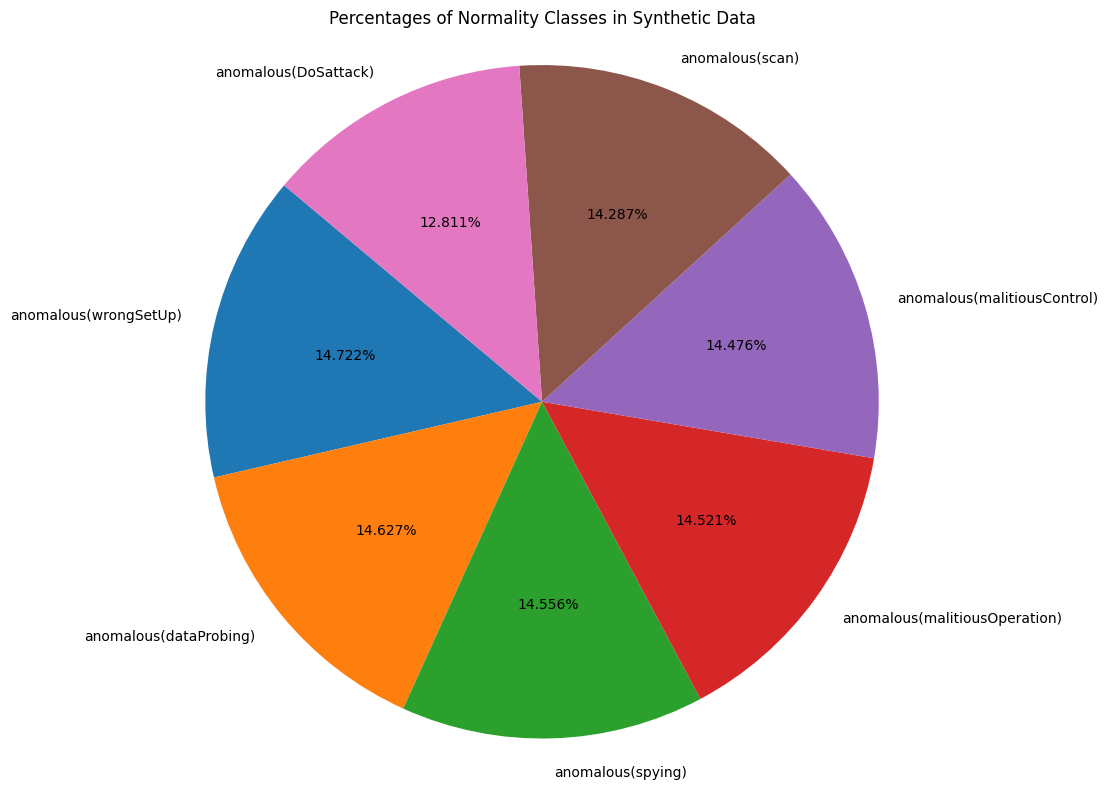

In [498]:
import matplotlib.pyplot as plt

# Calculate value counts of 'normality' column
normality_counts = synthetic_data1['normality'].value_counts()
#normality_counts = data['normality'].value_counts()
# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

# Mapping of encoded values to original labels
labels = {
    7: 'normal',
    0: 'anomalous(DoSattack)',
    4: 'anomalous(scan)',
    2: 'anomalous(malitiousControl)',
    3: 'anomalous(malitiousOperation)',
    5: 'anomalous(spying)',
    1: 'anomalous(dataProbing)',
    6: 'anomalous(wrongSetUp)'
}

# Prepare labels and sizes for the pie chart
labels = [labels[idx] for idx in normality_counts.index]
sizes = normality_percentages.values

# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=140)
plt.title('Percentages of Normality Classes in Synthetic Data')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()


Percentages of values in the 'normality' column:
7: 10.000%
4: 10.000%
0: 10.000%
5: 10.000%
2: 10.000%
1: 10.000%
3: 10.000%
6: 10.000%


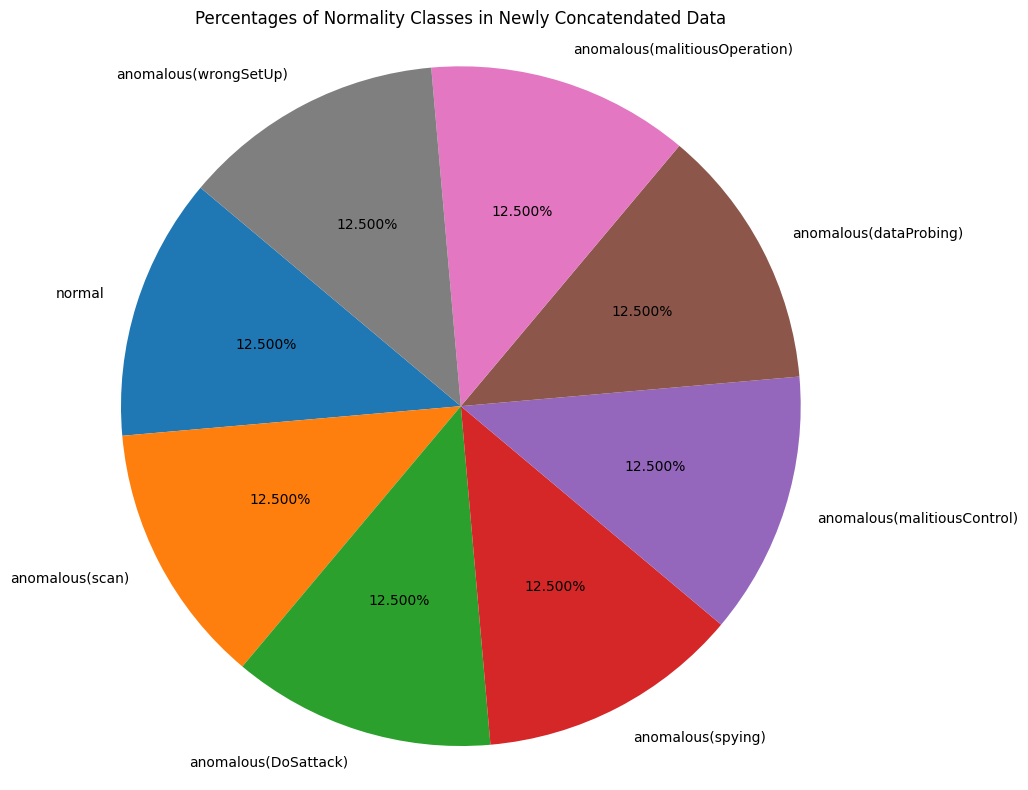

In [499]:
import matplotlib.pyplot as plt

# Calculate value counts of 'normality' column
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

# Mapping of encoded values to original labels
labels = {
    7: 'normal',
    0: 'anomalous(DoSattack)',
    4: 'anomalous(scan)',
    2: 'anomalous(malitiousControl)',
    3: 'anomalous(malitiousOperation)',
    5: 'anomalous(spying)',
    1: 'anomalous(dataProbing)',
    6: 'anomalous(wrongSetUp)'
}

# Prepare labels and sizes for the pie chart
labels = [labels[idx] for idx in normality_counts.index]
sizes = normality_percentages.values

# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=140)
plt.title('Percentages of Normality Classes in Newly Concatendated Data')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()


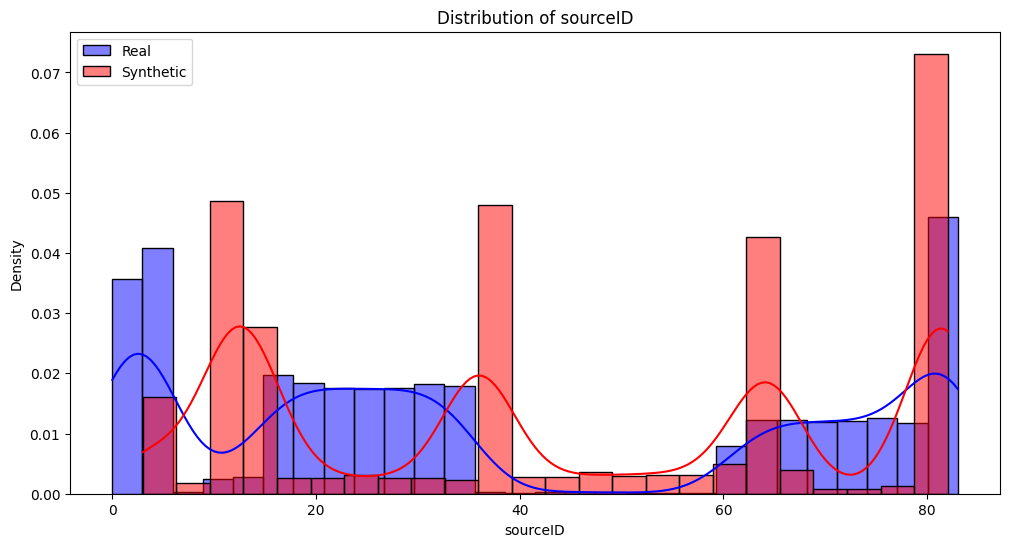

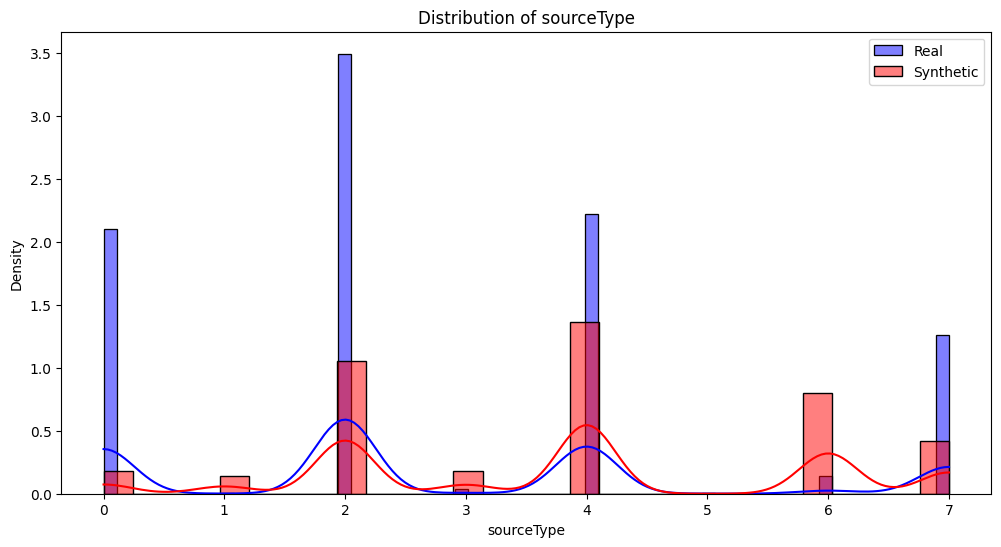

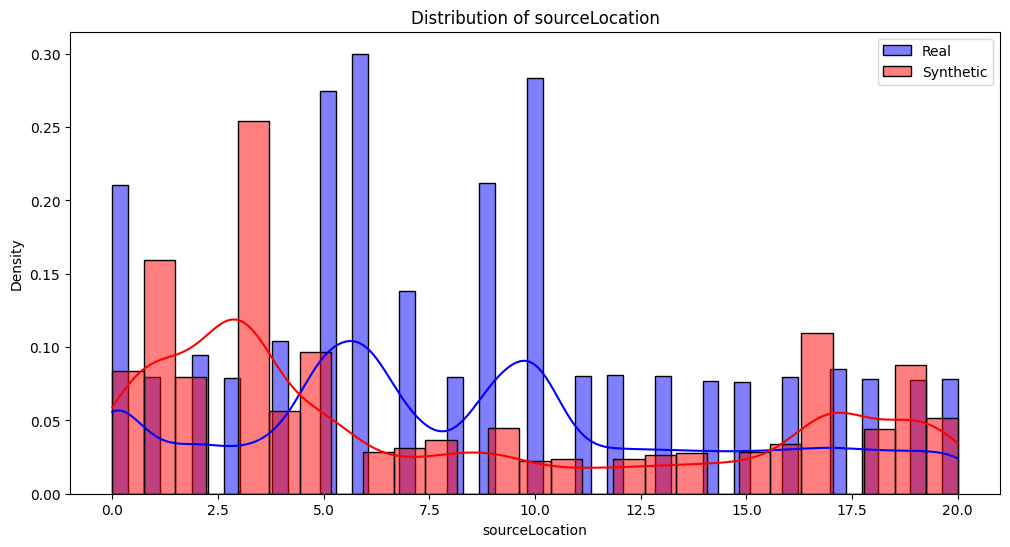

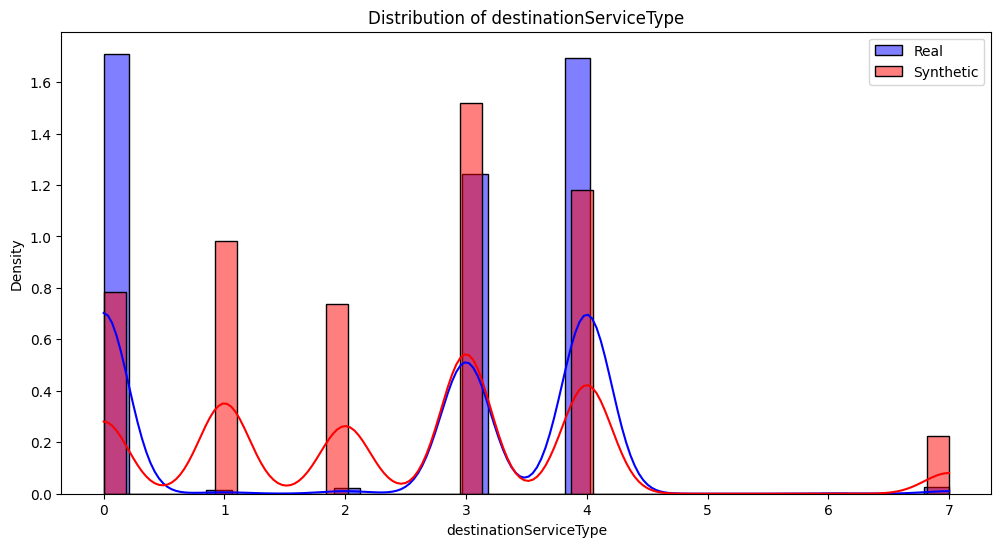

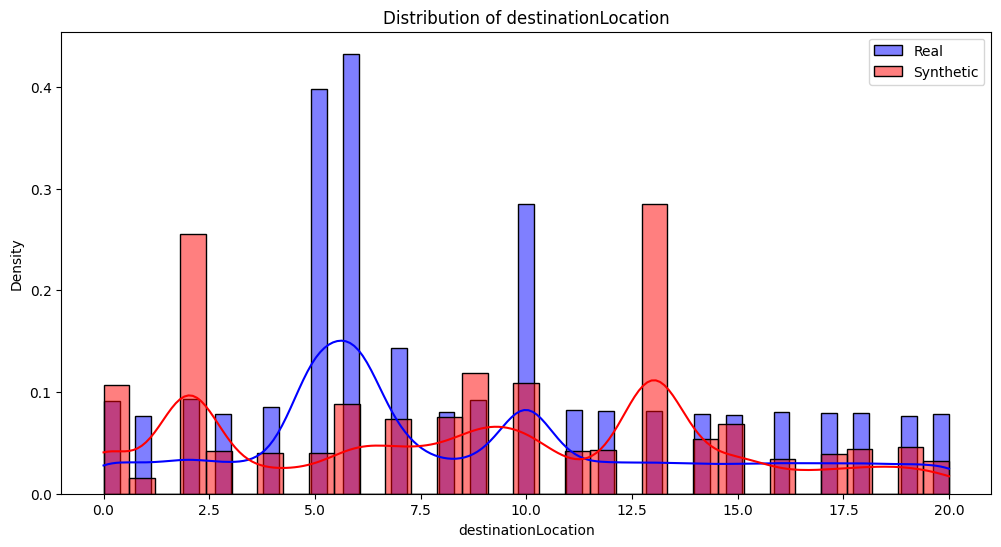

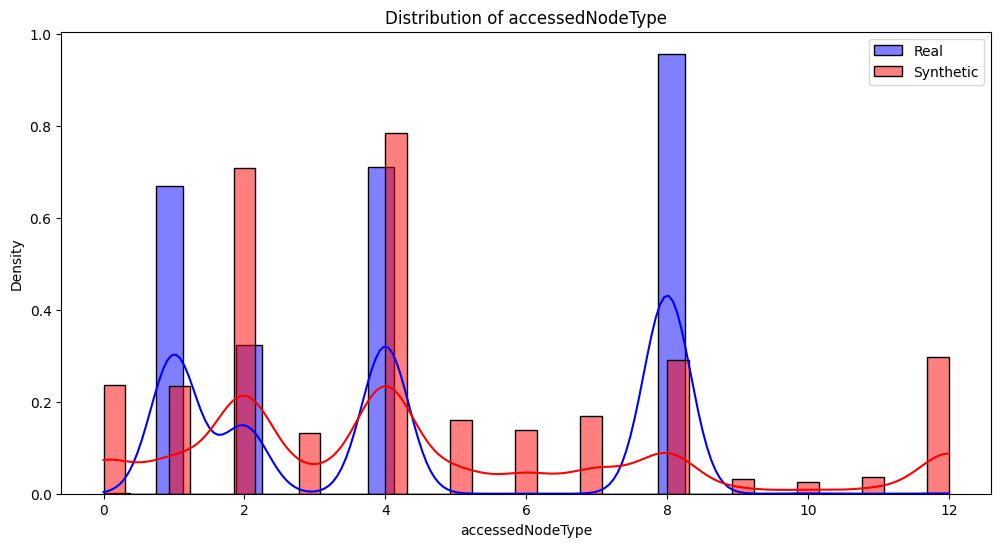

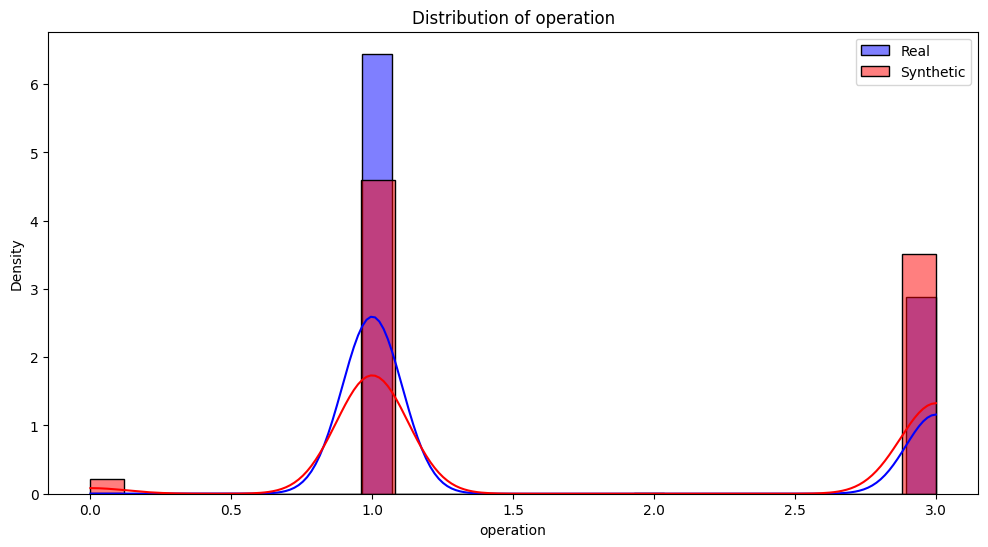

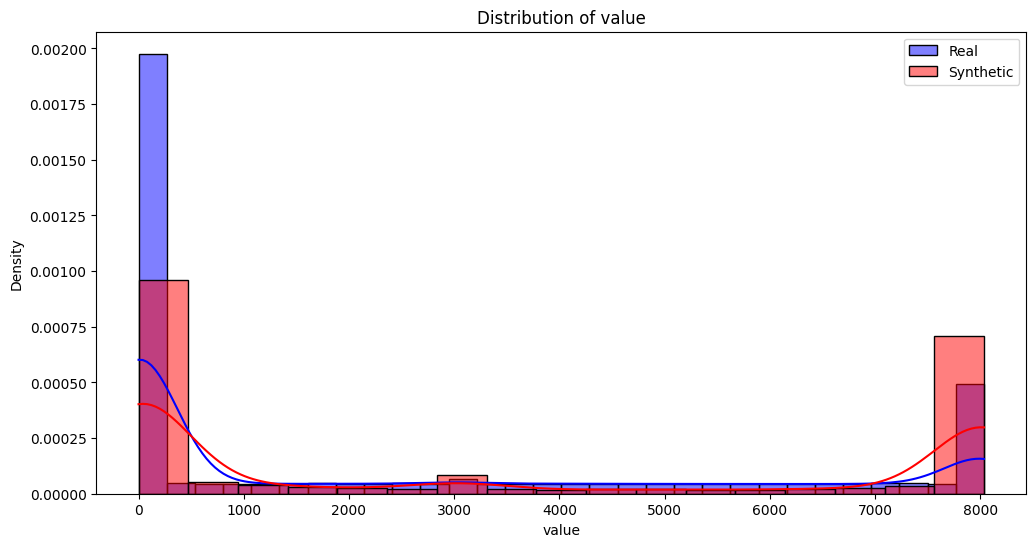

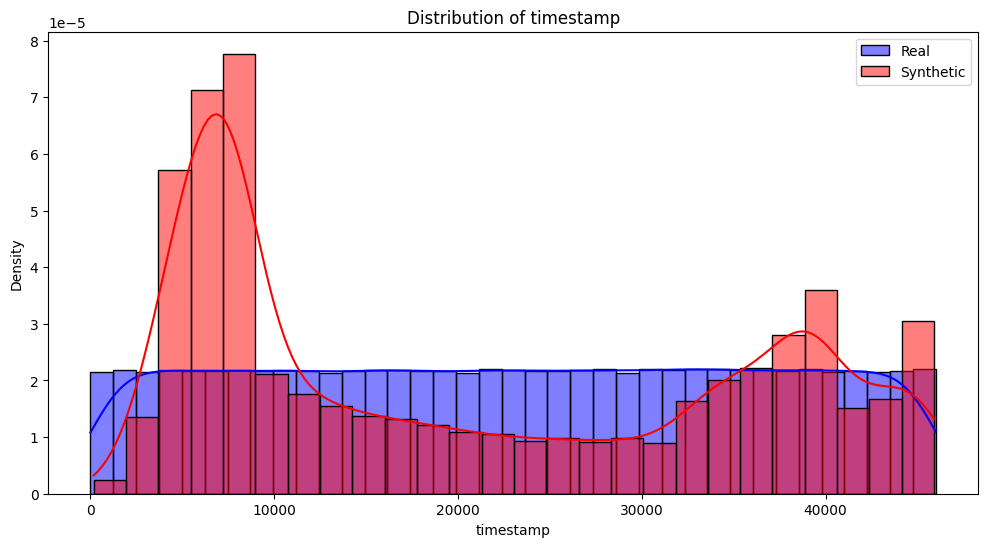

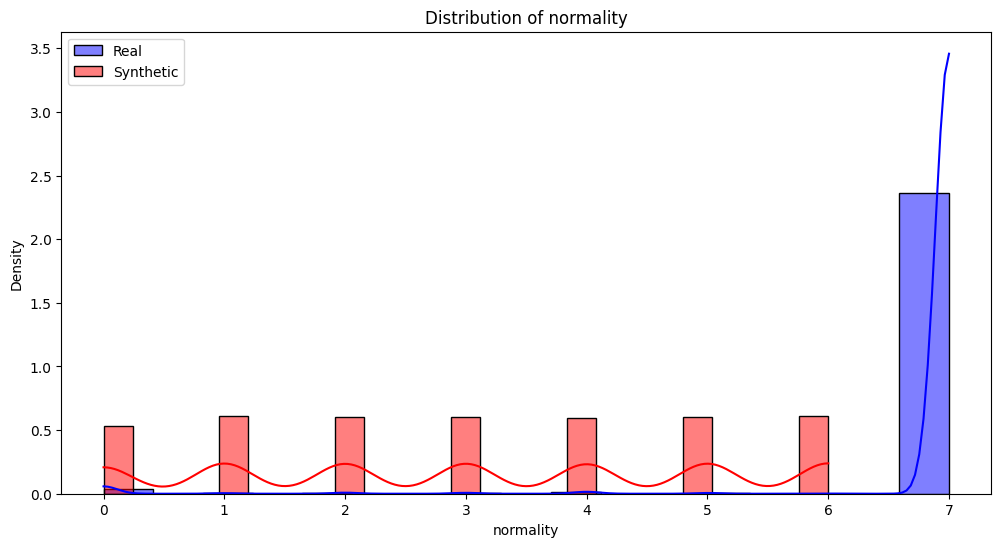

In [500]:
for column in real_data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(real_data[column], color='blue', label='Real', kde=True, stat="density")
    sns.histplot(synthetic_data1[column], color='red', label='Synthetic', kde=True, stat="density")
    plt.legend()
    plt.title(f'Distribution of {column}')
    plt.show()

## APPLYING CTGANSynthesizer

In [501]:
from sdv.single_table import CTGANSynthesizer

# Generate synthetic data per minority class to reach 5000 each
synthetic_parts = []
class_counts = X_simulation[X_simulation.normality != 7].normality.value_counts()

for cls, count in class_counts.items():
    needed = max(0, 5000 - count)
    if needed > 0:
        cls_data = X_simulation[X_simulation.normality == cls]
        synth = CTGANSynthesizer(metadata)
        synth.fit(cls_data)
        synthetic_cls = synth.sample(num_rows=needed)
        synthetic_parts.append(synthetic_cls)
        print(f"Class {cls}: had {count}, generated {needed} synthetic rows")
    else:
        print(f"Class {cls}: already has {count} rows, no synthetic needed")

synthetic_data_ct1 = pd.concat(synthetic_parts, axis=0, ignore_index=True)
print(f"\nTotal synthetic rows generated: {len(synthetic_data_ct1)}")

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 0: had 662, generated 4338 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 4: had 162, generated 4838 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 2: had 98, generated 4902 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 3: had 83, generated 4917 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 5: had 71, generated 4929 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 1: had 47, generated 4953 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 6: had 15, generated 4985 synthetic rows

Total synthetic rows generated: 33862


In [502]:
synthesizer_ct1.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'locales': ['en_US'],
 'embedding_dim': 128,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'generator_lr': 0.0002,
 'generator_decay': 1e-06,
 'discriminator_lr': 0.0002,
 'discriminator_decay': 1e-06,
 'batch_size': 500,
 'discriminator_steps': 1,
 'log_frequency': True,
 'verbose': False,
 'epochs': 300,
 'pac': 10,
 'enable_gpu': True}

In [503]:
def calculate_statistics(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[float, int])

    mean_values = numeric_df.mean()
    median_values = numeric_df.median()
    mode_values = numeric_df.mode().iloc[0]  # mode() returns a DataFrame, so take the first row

    return mean_values, median_values, mode_values

def create_summary_table(df, dataset_name):
    mean, median, mode = calculate_statistics(df)

    summary_df = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        'Mode': mode
    })

    summary_df.index.name = dataset_name
    return summary_df

# Create summary tables for real data
summary_table_real1 = create_summary_table(real_data, 'real_data')


# Assuming the synthetic datasets are loaded
# Create summary tables for synthetic data
summary_table_synthetic1 = create_summary_table(synthetic_data_ct1, 'synthetic_data_ct1')


# Concatenate summary tables for comparison
summary_table_combined1 = pd.concat([summary_table_real1, summary_table_synthetic1], keys=['Real', 'Synthetic'])

# Display combined summary tables
print("Combined Summary Table for Dataset 1")
print(summary_table_combined1)


Combined Summary Table for Dataset 1
                                          Mean   Median    Mode
          real_data                                            
Real      sourceID                   38.388580     29.0    81.0
          sourceType                  2.773160      2.0     2.0
          sourceLocation              8.581460      8.0     6.0
          destinationServiceType      2.283000      3.0     0.0
          destinationLocation         8.685900      7.0     6.0
          accessedNodeType            4.448300      4.0     8.0
          operation                   1.617040      1.0     1.0
          value                    2413.132860     13.0     1.0
          timestamp               23025.316520  23041.5  1790.0
          normality                   6.842500      7.0     7.0
Synthetic sourceID                   45.197803     40.0    36.0
          sourceType                  3.736726      4.0     4.0
          sourceLocation              6.912970      5.0     3.0
   

In [504]:
synthesizer_ct1.get_loss_values()

,Epoch,Generator Loss,Discriminator Loss
0,0,1.857518,0.003158
1,1,1.845169,-0.037356
2,2,1.763251,-0.042873
3,3,1.800108,-0.052155
4,4,1.745472,-0.048960
...,...,...,...
295,295,-0.362552,-1.183649
296,296,-0.458151,-0.878231
297,297,-0.446633,-0.945168
298,298,-0.456811,-0.899956


In [505]:
fig1 = synthesizer_ct1.get_loss_values_plot()
fig1.show()

## Checking the quality

In [506]:
from sdv.evaluation.single_table import evaluate_quality

quality_report_ct1 = evaluate_quality(
    real_data,
    synthetic_data_ct1,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 10/10 [00:00<00:00, 111.45it/s]|
Column Shapes Score: 68.35%

(2/2) Evaluating Column Pair Trends: |██████████| 45/45 [00:00<00:00, 311.00it/s]|
Column Pair Trends Score: 40.38%

Overall Score (Average): 54.36%



In [507]:
quality_report_ct1.get_details('Column Shapes')

,Column,Metric,Score
0,sourceID,KSComplement,0.719211
1,sourceType,TVComplement,0.719070
2,sourceLocation,KSComplement,0.749985
3,destinationServiceType,TVComplement,0.653754
4,destinationLocation,KSComplement,0.722882
5,accessedNodeType,KSComplement,0.759234
6,operation,TVComplement,0.865425
7,value,KSComplement,0.802492
8,timestamp,KSComplement,0.815123
9,normality,TVComplement,0.028120


## visualizing the synthethic data

In [508]:
quality_report_ct1.get_visualization('Column Shapes')


In [509]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data_ct1,
    column_name='normality',
    metadata=metadata
)

fig.show()

In [510]:
# Smart balancing: equalize all classes to ~5000 rows each
import pandas as pd

# Downsample normal class
normal_data = X_simulation[X_simulation.normality == 7].sample(n=5000, random_state=42)

# Keep all real anomalous data
anomalous_data = X_simulation[X_simulation.normality != 7]

# Add synthetic data (anomalous only)
data = pd.concat([normal_data, anomalous_data, synthetic_data_ct1], axis=0, ignore_index=True)

print("Class distribution after smart balancing:")
print(data.normality.value_counts().sort_index())
print(f"\nTotal rows: {len(data)}")

Class distribution after smart balancing:
normality
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
Name: count, dtype: int64

Total rows: 40000


## Applying ML algorithms to test the accuracy

In [511]:
target_variable = 'normality'

In [512]:
# Correct evaluation: train on balanced augmented data, test on held-out real test set
# X_test and y_test come from Cell 42's train_test_split on real_data

X_aug = data.drop(columns=['normality'])
y_aug = data[target_variable]

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'SGD Classifier': SGDClassifier(),
    'Bagging Classifier': BaggingClassifier()
}

# Train and evaluate each model
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

for name, model in models.items():
    model.fit(X_aug, y_aug)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                    Model  Accuracy  Precision  Recall
0     Logistic Regression    0.2294   0.968375  0.2294
1             Naive Bayes    0.3981   0.976285  0.3981
2           Decision Tree    0.9902   0.993710  0.9902
3           Random Forest    0.9941   0.995420  0.9941
4                AdaBoost    0.7340   0.979210  0.7340
5       Gradient Boosting    0.9890   0.992914  0.9890
6     K-Nearest Neighbors    0.3579   0.975319  0.3579
7  Support Vector Machine    0.1282   0.972890  0.1282
8          SGD Classifier    0.0018   0.000249  0.0018
9      Bagging Classifier    0.9893   0.993234  0.9893


In [513]:
# Per-class recall: "What % of each attack type did we catch?"
from sklearn.metrics import classification_report
import numpy as np

class_names = {
    0: 'DoS Attack',
    1: 'Data Probing', 
    2: 'Malicious Control',
    3: 'Malicious Operation',
    4: 'Scan',
    5: 'Spying',
    6: 'Wrong Setup',
    7: 'Normal'
}

# Use the best model from results (Random Forest)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_aug, y_aug)
y_pred_best = best_model.predict(X_test)

# Per-class recall
print("=== Per-Class Recall (Random Forest) ===")
print(f"{'Class':<25} {'Recall':>8} {'Support':>10}")
print("-" * 45)

report = classification_report(y_test, y_pred_best, output_dict=True, zero_division=0)
for cls_id in sorted(class_names.keys()):
    cls_str = str(cls_id)
    if cls_str in report:
        recall = report[cls_str]['recall']
        support = int(report[cls_str]['support'])
        print(f"{class_names[cls_id]:<25} {recall:>8.4f} {support:>10}")

print("-" * 45)
print(f"{'Weighted Average':<25} {report['weighted avg']['recall']:>8.4f} {int(report['weighted avg']['support']):>10}")
print(f"{'Macro Average':<25} {report['macro avg']['recall']:>8.4f}")

=== Per-Class Recall (Random Forest) ===
Class                       Recall    Support
---------------------------------------------
DoS Attack                  1.0000        153
Data Probing                1.0000         13
Malicious Control           0.9500         20
Malicious Operation         1.0000         17
Scan                        1.0000         50
Spying                      1.0000         12
Wrong Setup                 1.0000          3
Normal                      0.9943       9732
---------------------------------------------
Weighted Average            0.9944      10000
Macro Average               0.9930


In [514]:
# Calculate value counts of 'normality' column
#normality_counts = synthetic_data_ct1['normality'].value_counts()
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

Percentages of values in the 'normality' column:
7: 10.000%
4: 10.000%
0: 10.000%
5: 10.000%
2: 10.000%
1: 10.000%
3: 10.000%
6: 10.000%


Percentages of values in the 'normality' column:
7: 10.000%
4: 10.000%
0: 10.000%
5: 10.000%
2: 10.000%
1: 10.000%
3: 10.000%
6: 10.000%


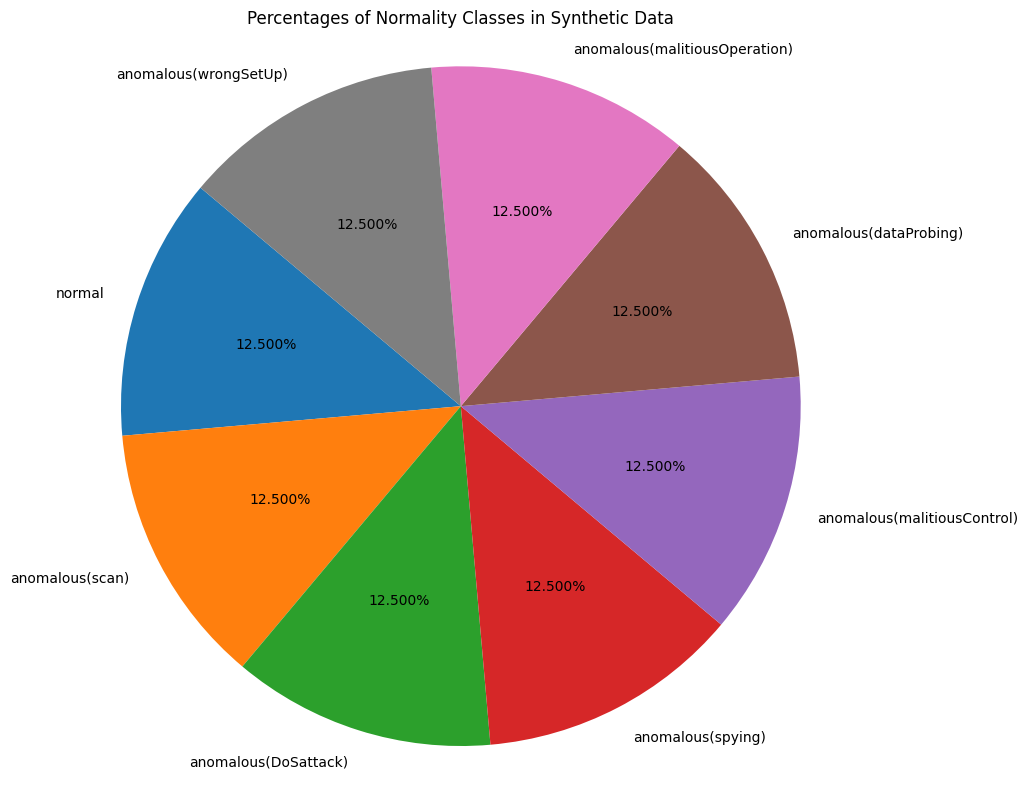

In [515]:
import matplotlib.pyplot as plt

# Calculate value counts of 'normality' column
#normality_counts = synthetic_data_ct1['normality'].value_counts()
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

# Mapping of encoded values to original labels
labels = {
    7: 'normal',
    0: 'anomalous(DoSattack)',
    4: 'anomalous(scan)',
    2: 'anomalous(malitiousControl)',
    3: 'anomalous(malitiousOperation)',
    5: 'anomalous(spying)',
    1: 'anomalous(dataProbing)',
    6: 'anomalous(wrongSetUp)'
}

# Prepare labels and sizes for the pie chart
labels = [labels[idx] for idx in normality_counts.index]
sizes = normality_percentages.values

# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=140)
plt.title('Percentages of Normality Classes in Synthetic Data')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()


Percentages of values in the 'normality' column:
7: 10.000%
4: 10.000%
0: 10.000%
5: 10.000%
2: 10.000%
1: 10.000%
3: 10.000%
6: 10.000%


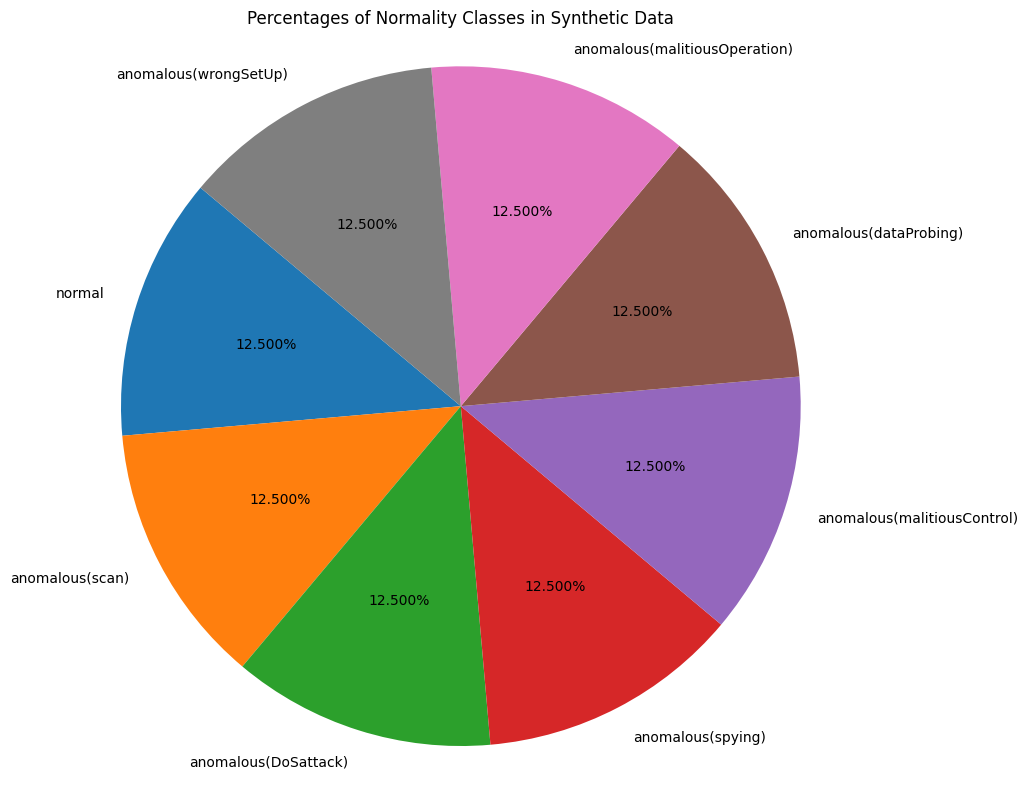

In [516]:
import matplotlib.pyplot as plt

# Calculate value counts of 'normality' column
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

# Mapping of encoded values to original labels
labels = {
    7: 'normal',
    0: 'anomalous(DoSattack)',
    4: 'anomalous(scan)',
    2: 'anomalous(malitiousControl)',
    3: 'anomalous(malitiousOperation)',
    5: 'anomalous(spying)',
    1: 'anomalous(dataProbing)',
    6: 'anomalous(wrongSetUp)'
}

# Prepare labels and sizes for the pie chart
labels = [labels[idx] for idx in normality_counts.index]
sizes = normality_percentages.values

# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=140)
plt.title('Percentages of Normality Classes in Synthetic Data')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()


### Original Data Percentages

normal (7): 97.342%

anomalous(DoSattack) (0): 1.560%

anomalous(scan) (4): 0.372%

anomalous(malitiousControl) (2): 0.216%

anomalous(malitiousOperation) (3): 0.198%

anomalous(spying) (5): 0.172%

anomalous(dataProbing) (1): 0.112%

anomalous(wrongSetUp) (6): 0.028%

### Synthetic Data Percentages

normal (7): 97.222%

anomalous(DoSattack) (0): 1.594%

anomalous(scan) (4): 0.422%

anomalous(malitiousControl) (2): 0.224%

anomalous(malitiousOperation) (3): 0.186%

anomalous(spying) (5): 0.192%

anomalous(dataProbing) (1): 0.132%

anomalous(wrongSetUp) (6): 0.028%

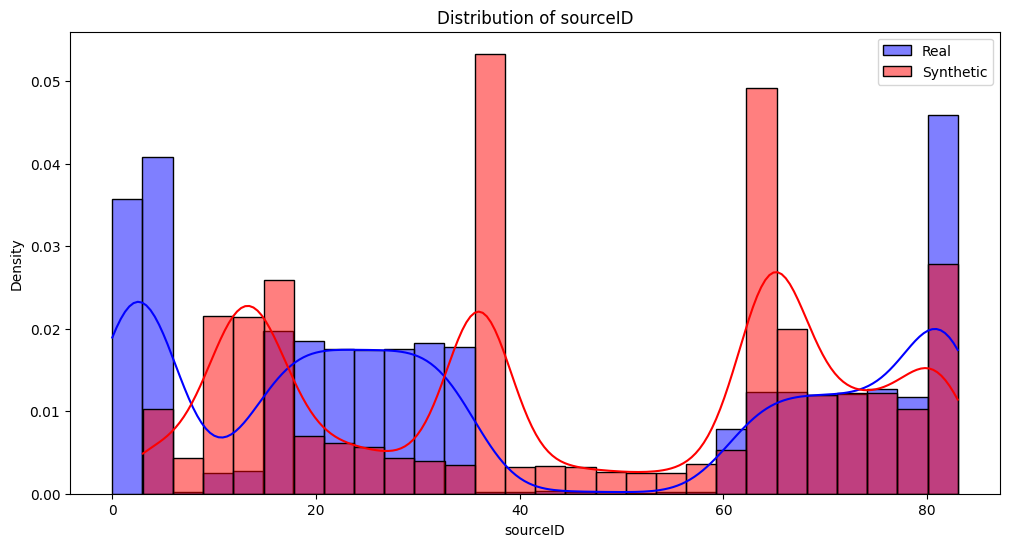

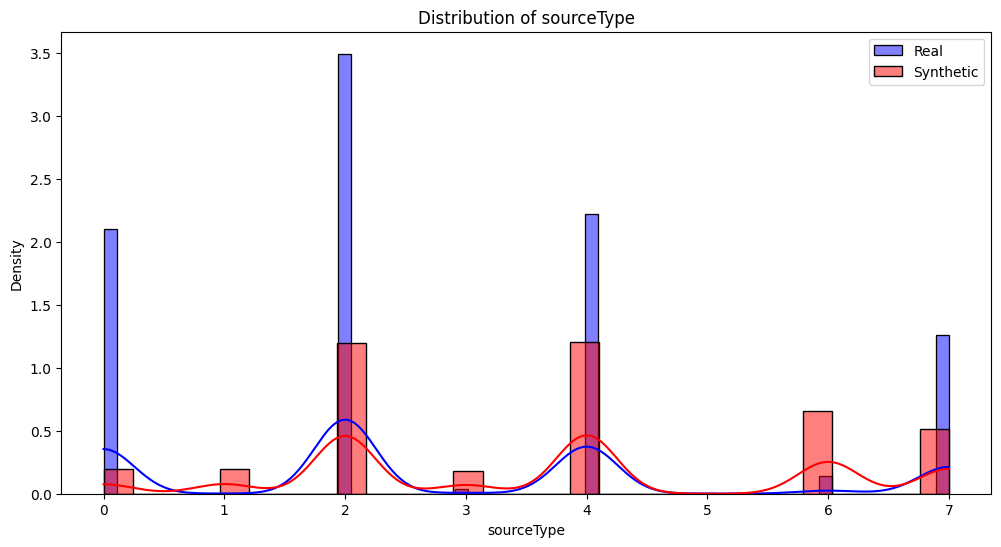

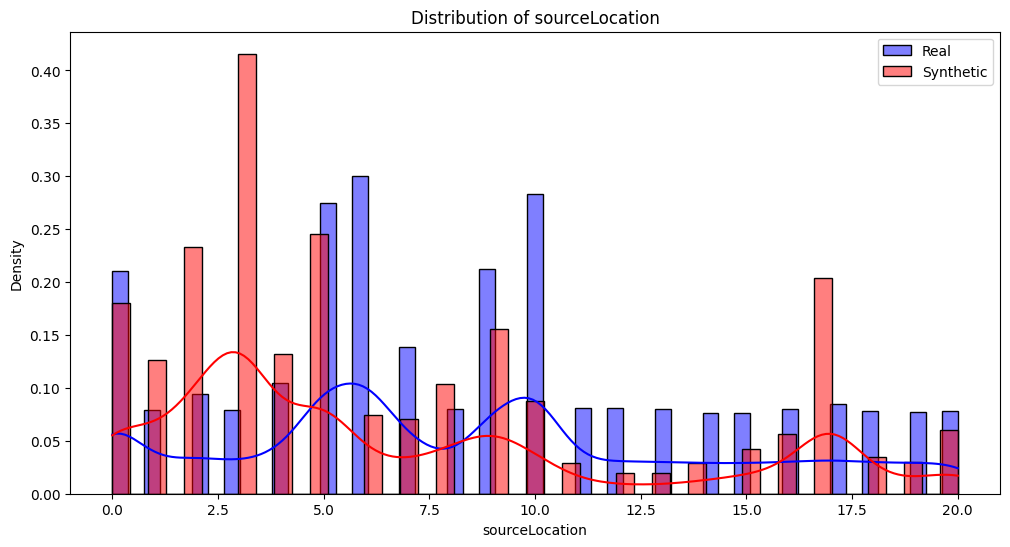

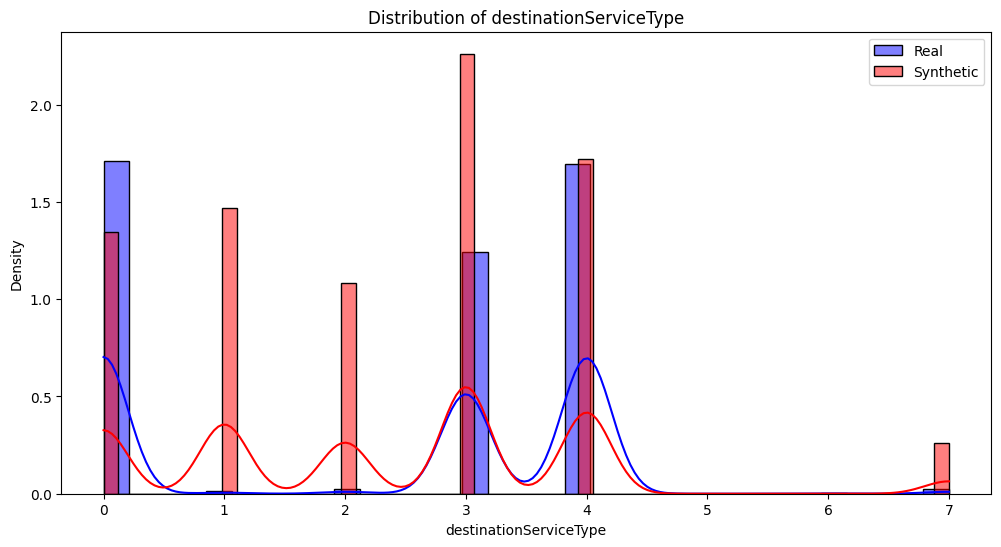

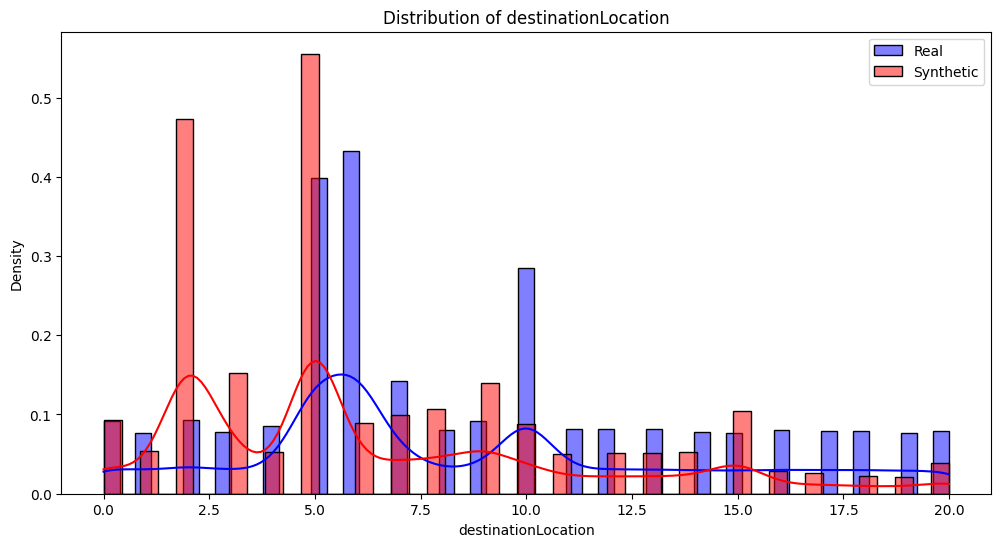

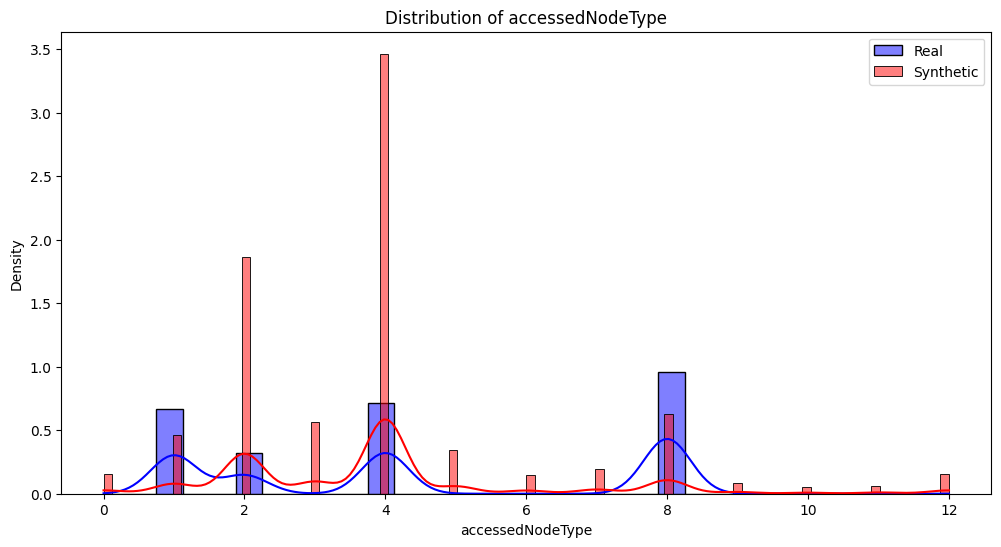

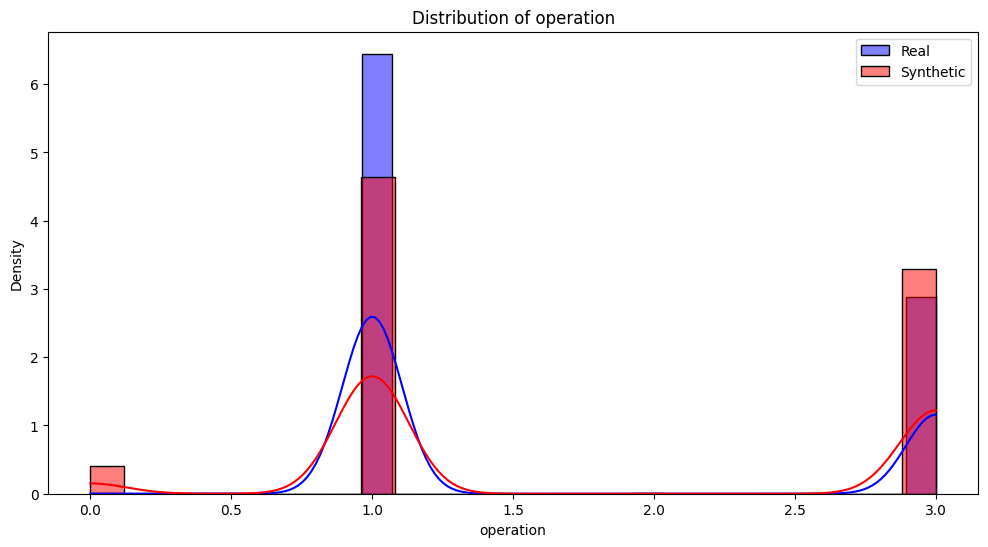

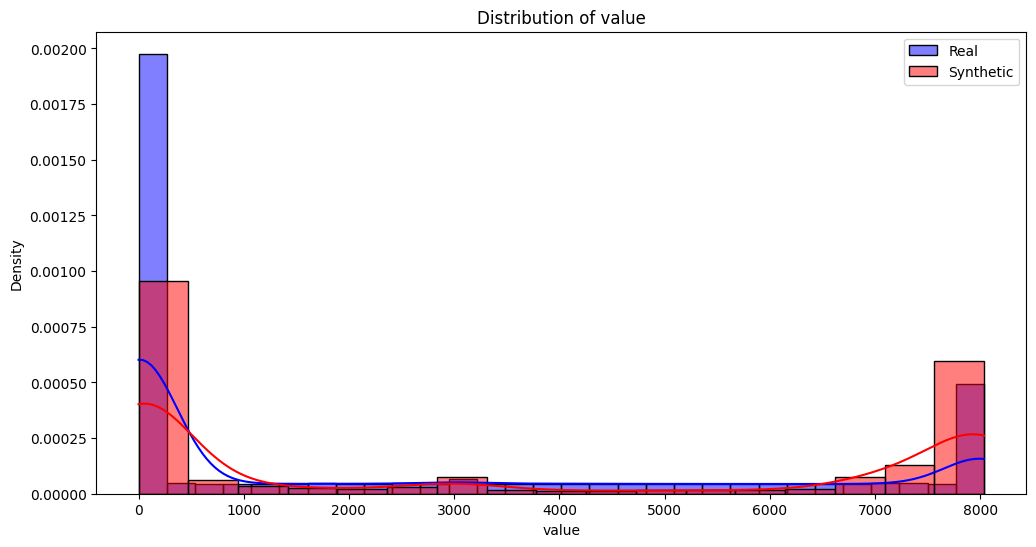

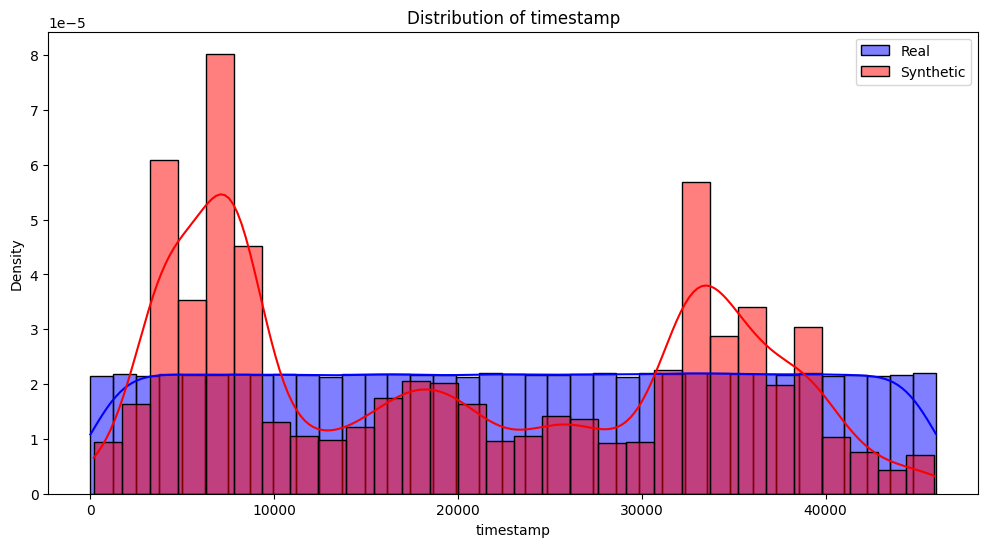

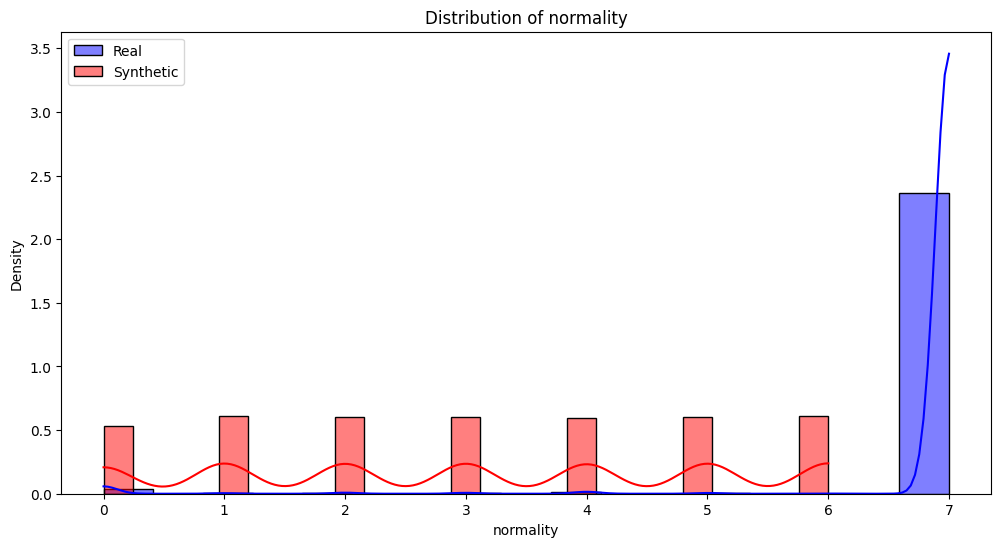

In [517]:
for column in real_data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(real_data[column], color='blue', label='Real', kde=True, stat="density")
    sns.histplot(synthetic_data_ct1[column], color='red', label='Synthetic', kde=True, stat="density")
    plt.legend()
    plt.title(f'Distribution of {column}')
    plt.show()

## Applying TVAE syntetizer

In [518]:
from sdv.single_table import TVAESynthesizer

# Generate synthetic data per minority class to reach 5000 each
synthetic_parts = []
class_counts = X_simulation[X_simulation.normality != 7].normality.value_counts()

for cls, count in class_counts.items():
    needed = max(0, 5000 - count)
    if needed > 0:
        cls_data = X_simulation[X_simulation.normality == cls]
        synth = TVAESynthesizer(metadata)
        synth.fit(cls_data)
        synthetic_cls = synth.sample(num_rows=needed)
        synthetic_parts.append(synthetic_cls)
        print(f"Class {cls}: had {count}, generated {needed} synthetic rows")
    else:
        print(f"Class {cls}: already has {count} rows, no synthetic needed")

synthetic_data_tv1 = pd.concat(synthetic_parts, axis=0, ignore_index=True)
print(f"\nTotal synthetic rows generated: {len(synthetic_data_tv1)}")

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 0: had 662, generated 4338 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 4: had 162, generated 4838 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 2: had 98, generated 4902 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 3: had 83, generated 4917 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 5: had 71, generated 4929 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 1: had 47, generated 4953 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 6: had 15, generated 4985 synthetic rows

Total synthetic rows generated: 33862


In [519]:
# Per-class synthesis done in previous cell

In [520]:
synthesizer_tv1.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'embedding_dim': 128,
 'compress_dims': (128, 128),
 'decompress_dims': (128, 128),
 'l2scale': 1e-05,
 'batch_size': 500,
 'verbose': False,
 'epochs': 300,
 'loss_factor': 2,
 'enable_gpu': True}

In [521]:
synthesizer_tv1.get_loss_values()

,Epoch,Batch,Loss
0,0,0,30.769045
1,0,1,28.329708
2,0,2,28.759235
3,1,0,27.938871
4,1,1,26.315161
...,...,...,...
895,298,1,-11.632113
896,298,2,-8.264030
897,299,0,-12.240652
898,299,1,-9.716438


In [522]:
from sdv.lite import SingleTablePreset
# Create summary tables for real data
summary_table_real1 = create_summary_table(real_data, 'real_data1')


# Assuming the synthetic datasets are loaded
# Create summary tables for synthetic data
summary_table_synthetic1 = create_summary_table(synthetic_data_tv1, 'synthetic_data_tv1')



# Concatenate summary tables for comparison
summary_table_combined1 = pd.concat([summary_table_real1, summary_table_synthetic1], keys=['Real', 'Synthetic'])


# Display combined summary tables
print("Combined Summary Table for Dataset 1")
print(summary_table_combined1)



Combined Summary Table for Dataset 1
                                          Mean   Median    Mode
          real_data1                                           
Real      sourceID                   38.388580     29.0    81.0
          sourceType                  2.773160      2.0     2.0
          sourceLocation              8.581460      8.0     6.0
          destinationServiceType      2.283000      3.0     0.0
          destinationLocation         8.685900      7.0     6.0
          accessedNodeType            4.448300      4.0     8.0
          operation                   1.617040      1.0     1.0
          value                    2413.132860     13.0     1.0
          timestamp               23025.316520  23041.5  1790.0
          normality                   6.842500      7.0     7.0
Synthetic sourceID                   44.221812     36.0    36.0
          sourceType                  3.873605      4.0     4.0
          sourceLocation              7.516390      4.0     3.0
   

In [523]:
from sdv.evaluation.single_table import evaluate_quality

quality_report_tv1 = evaluate_quality(
    X_simulation,
    synthetic_data_tv1,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 10/10 [00:00<00:00, 121.16it/s]|
Column Shapes Score: 67.32%

(2/2) Evaluating Column Pair Trends: |██████████| 45/45 [00:00<00:00, 358.76it/s]|
Column Pair Trends Score: 41.57%

Overall Score (Average): 54.44%



In [524]:
quality_report_tv1.get_details('Column Shapes')

,Column,Metric,Score
0,sourceID,KSComplement,0.738510
1,sourceType,TVComplement,0.558806
2,sourceLocation,KSComplement,0.678967
3,destinationServiceType,TVComplement,0.639586
4,destinationLocation,KSComplement,0.839953
5,accessedNodeType,KSComplement,0.799224
6,operation,TVComplement,0.873175
7,value,KSComplement,0.749443
8,timestamp,KSComplement,0.825408
9,normality,TVComplement,0.028450


In [525]:
quality_report_tv1.get_visualization('Column Shapes')


In [526]:
# Smart balancing: equalize all classes to ~5000 rows each
import pandas as pd

# Downsample normal class
normal_data = X_simulation[X_simulation.normality == 7].sample(n=5000, random_state=42)

# Keep all real anomalous data
anomalous_data = X_simulation[X_simulation.normality != 7]

# Add synthetic data (anomalous only)
data = pd.concat([normal_data, anomalous_data, synthetic_data_tv1], axis=0, ignore_index=True)

print("Class distribution after smart balancing:")
print(data.normality.value_counts().sort_index())
print(f"\nTotal rows: {len(data)}")

Class distribution after smart balancing:
normality
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
Name: count, dtype: int64

Total rows: 40000


Percentages of values in the 'normality' column:
7: 10.000%
4: 10.000%
0: 10.000%
5: 10.000%
2: 10.000%
1: 10.000%
3: 10.000%
6: 10.000%


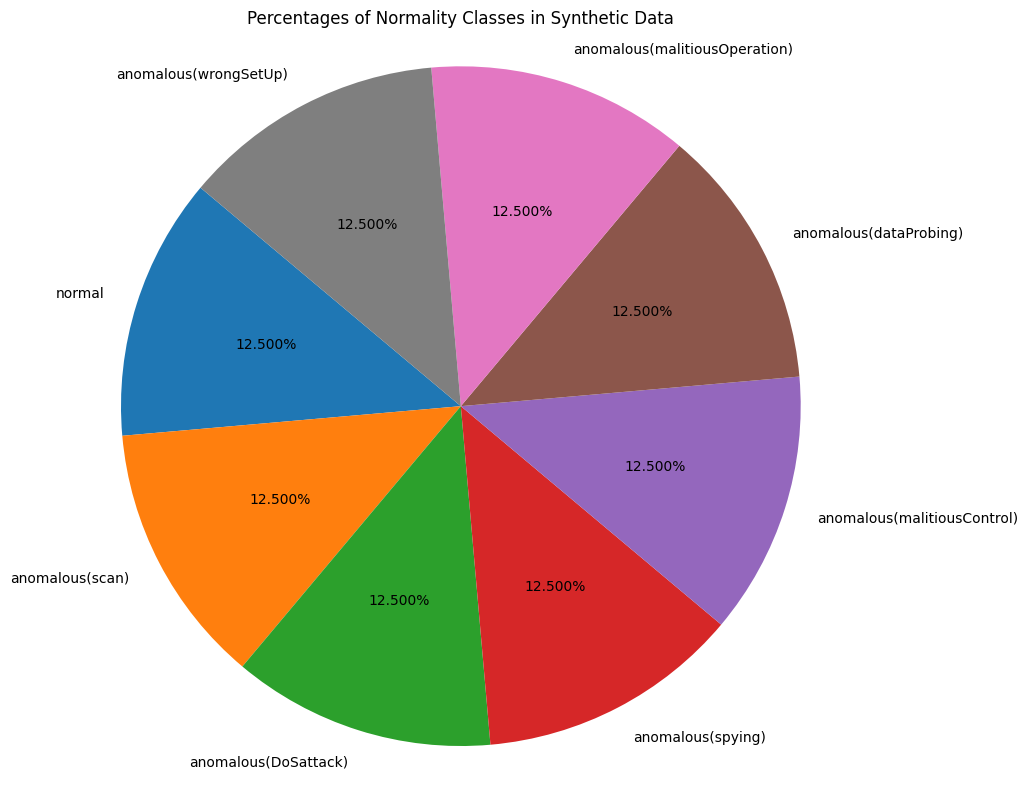

In [527]:
import matplotlib.pyplot as plt

# Calculate value counts of 'normality' column
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

# Mapping of encoded values to original labels
labels = {
    7: 'normal',
    0: 'anomalous(DoSattack)',
    4: 'anomalous(scan)',
    2: 'anomalous(malitiousControl)',
    3: 'anomalous(malitiousOperation)',
    5: 'anomalous(spying)',
    1: 'anomalous(dataProbing)',
    6: 'anomalous(wrongSetUp)'
}

# Prepare labels and sizes for the pie chart
labels = [labels[idx] for idx in normality_counts.index]
sizes = normality_percentages.values

# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=140)
plt.title('Percentages of Normality Classes in Synthetic Data')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()


In [528]:
# Calculate value counts of 'normality' column
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

Percentages of values in the 'normality' column:
7: 10.000%
4: 10.000%
0: 10.000%
5: 10.000%
2: 10.000%
1: 10.000%
3: 10.000%
6: 10.000%


In [529]:
# Correct evaluation: train on balanced augmented data, test on held-out real test set
# X_test and y_test come from Cell 42's train_test_split on real_data

X_aug = data.drop(columns=['normality'])
y_aug = data[target_variable]

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'SGD Classifier': SGDClassifier(),
    'Bagging Classifier': BaggingClassifier()
}

# Train and evaluate each model
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

for name, model in models.items():
    model.fit(X_aug, y_aug)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                    Model  Accuracy  Precision  Recall
0     Logistic Regression    0.1023   0.974419  0.1023
1             Naive Bayes    0.5950   0.975987  0.5950
2           Decision Tree    0.9991   0.999191  0.9991
3           Random Forest    0.9995   0.999516  0.9995
4                AdaBoost    0.5590   0.969534  0.5590
5       Gradient Boosting    0.9994   0.999427  0.9994
6     K-Nearest Neighbors    0.7125   0.987071  0.7125
7  Support Vector Machine    0.2669   0.972372  0.2669
8          SGD Classifier    0.0804   0.973663  0.0804
9      Bagging Classifier    0.9987   0.998791  0.9987


In [530]:
# Per-class recall: "What % of each attack type did we catch?"
from sklearn.metrics import classification_report
import numpy as np

class_names = {
    0: 'DoS Attack',
    1: 'Data Probing', 
    2: 'Malicious Control',
    3: 'Malicious Operation',
    4: 'Scan',
    5: 'Spying',
    6: 'Wrong Setup',
    7: 'Normal'
}

# Use the best model from results (Random Forest)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_aug, y_aug)
y_pred_best = best_model.predict(X_test)

# Per-class recall
print("=== Per-Class Recall (Random Forest) ===")
print(f"{'Class':<25} {'Recall':>8} {'Support':>10}")
print("-" * 45)

report = classification_report(y_test, y_pred_best, output_dict=True, zero_division=0)
for cls_id in sorted(class_names.keys()):
    cls_str = str(cls_id)
    if cls_str in report:
        recall = report[cls_str]['recall']
        support = int(report[cls_str]['support'])
        print(f"{class_names[cls_id]:<25} {recall:>8.4f} {support:>10}")

print("-" * 45)
print(f"{'Weighted Average':<25} {report['weighted avg']['recall']:>8.4f} {int(report['weighted avg']['support']):>10}")
print(f"{'Macro Average':<25} {report['macro avg']['recall']:>8.4f}")

=== Per-Class Recall (Random Forest) ===
Class                       Recall    Support
---------------------------------------------
DoS Attack                  1.0000        153
Data Probing                1.0000         13
Malicious Control           0.9500         20
Malicious Operation         1.0000         17
Scan                        0.9800         50
Spying                      1.0000         12
Wrong Setup                 1.0000          3
Normal                      0.9996       9732
---------------------------------------------
Weighted Average            0.9994      10000
Macro Average               0.9912


### Original Data Percentages

normal (7): 97.342%

anomalous(DoSattack) (0): 1.560%

anomalous(scan) (4): 0.372%

anomalous(malitiousControl) (2): 0.216%

anomalous(malitiousOperation) (3): 0.198%

anomalous(spying) (5): 0.172%

anomalous(dataProbing) (1): 0.112%

anomalous(wrongSetUp) (6): 0.028%

## Applying CopulaGANSynthesizer

In [531]:
from sdv.single_table import CopulaGANSynthesizer

# Generate synthetic data per minority class to reach 5000 each
synthetic_parts = []
class_counts = X_simulation[X_simulation.normality != 7].normality.value_counts()

for cls, count in class_counts.items():
    needed = max(0, 5000 - count)
    if needed > 0:
        cls_data = X_simulation[X_simulation.normality == cls]
        synth = CopulaGANSynthesizer(metadata)
        synth.fit(cls_data)
        synthetic_cls = synth.sample(num_rows=needed)
        synthetic_parts.append(synthetic_cls)
        print(f"Class {cls}: had {count}, generated {needed} synthetic rows")
    else:
        print(f"Class {cls}: already has {count} rows, no synthetic needed")

synthetic_data_cg1 = pd.concat(synthetic_parts, axis=0, ignore_index=True)
print(f"\nTotal synthetic rows generated: {len(synthetic_data_cg1)}")

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 0: had 662, generated 4338 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 4: had 162, generated 4838 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 2: had 98, generated 4902 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 3: had 83, generated 4917 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 5: had 71, generated 4929 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 1: had 47, generated 4953 synthetic rows


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



Class 6: had 15, generated 4985 synthetic rows

Total synthetic rows generated: 33862


In [532]:
# Per-class synthesis done in previous cell

In [533]:
synthesizer_cg1.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'locales': ['en_US'],
 'embedding_dim': 128,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'generator_lr': 0.0002,
 'generator_decay': 1e-06,
 'discriminator_lr': 0.0002,
 'discriminator_decay': 1e-06,
 'batch_size': 500,
 'discriminator_steps': 1,
 'log_frequency': True,
 'verbose': False,
 'epochs': 300,
 'pac': 10,
 'enable_gpu': True}

In [534]:
# Create summary tables for real data
summary_table_real1 = create_summary_table(real_data, 'real_data1')


# Assuming the synthetic datasets are loaded
# Create summary tables for synthetic data
summary_table_synthetic1 = create_summary_table(synthetic_data_cg1, 'synthetic_data_cg1')


# Concatenate summary tables for comparison
summary_table_combined1 = pd.concat([summary_table_real1, summary_table_synthetic1], keys=['Real', 'Synthetic'])


# Display combined summary tables
print("Combined Summary Table for Dataset 1")
print(summary_table_combined1)



Combined Summary Table for Dataset 1
                                          Mean   Median     Mode
          real_data1                                            
Real      sourceID                   38.388580     29.0     81.0
          sourceType                  2.773160      2.0      2.0
          sourceLocation              8.581460      8.0      6.0
          destinationServiceType      2.283000      3.0      0.0
          destinationLocation         8.685900      7.0      6.0
          accessedNodeType            4.448300      4.0      8.0
          operation                   1.617040      1.0      1.0
          value                    2413.132860     13.0      1.0
          timestamp               23025.316520  23041.5   1790.0
          normality                   6.842500      7.0      7.0
Synthetic sourceID                   41.500886     36.0     36.0
          sourceType                  3.814541      4.0      4.0
          sourceLocation              6.556317      3

In [535]:
synthesizer_cg1.get_loss_values()

,Epoch,Generator Loss,Discriminator Loss
0,0,1.883767,-0.003776
1,1,1.857030,-0.010197
2,2,1.807246,-0.058421
3,3,1.824900,-0.062750
4,4,1.815054,-0.059156
...,...,...,...
295,295,-0.258191,-0.932812
296,296,-0.320777,-0.859508
297,297,-0.262577,-0.757300
298,298,-0.177910,-1.071966


In [536]:
fig1 = synthesizer_cg1.get_loss_values_plot()
fig1.show()


In [537]:
from sdv.evaluation.single_table import evaluate_quality

quality_report_cg1 = evaluate_quality(
    real_data,
    synthetic_data_cg1,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 10/10 [00:00<00:00, 90.84it/s]|
Column Shapes Score: 69.82%

(2/2) Evaluating Column Pair Trends: |██████████| 45/45 [00:00<00:00, 286.07it/s]|
Column Pair Trends Score: 40.51%

Overall Score (Average): 55.16%



In [538]:
quality_report_cg1.get_details('Column Shapes')

,Column,Metric,Score
0,sourceID,KSComplement,0.774907
1,sourceType,TVComplement,0.683219
2,sourceLocation,KSComplement,0.655960
3,destinationServiceType,TVComplement,0.672088
4,destinationLocation,KSComplement,0.842383
5,accessedNodeType,KSComplement,0.897332
6,operation,TVComplement,0.868083
7,value,KSComplement,0.756110
8,timestamp,KSComplement,0.804165
9,normality,TVComplement,0.028120


In [539]:
quality_report_cg1.get_visualization('Column Shapes')

In [540]:
# Smart balancing: equalize all classes to ~5000 rows each
import pandas as pd

# Downsample normal class
normal_data = X_simulation[X_simulation.normality == 7].sample(n=5000, random_state=42)

# Keep all real anomalous data
anomalous_data = X_simulation[X_simulation.normality != 7]

# Add synthetic data (anomalous only)
data = pd.concat([normal_data, anomalous_data, synthetic_data_cg1], axis=0, ignore_index=True)

print("Class distribution after smart balancing:")
print(data.normality.value_counts().sort_index())
print(f"\nTotal rows: {len(data)}")

Class distribution after smart balancing:
normality
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
Name: count, dtype: int64

Total rows: 40000


In [541]:
# Correct evaluation: train on balanced augmented data, test on held-out real test set
# X_test and y_test come from Cell 42's train_test_split on real_data

X_aug = data.drop(columns=['normality'])
y_aug = data[target_variable]

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'SGD Classifier': SGDClassifier(),
    'Bagging Classifier': BaggingClassifier()
}

# Train and evaluate each model
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

for name, model in models.items():
    model.fit(X_aug, y_aug)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                    Model  Accuracy  Precision  Recall
0     Logistic Regression    0.0779   0.969290  0.0779
1             Naive Bayes    0.3660   0.977318  0.3660
2           Decision Tree    0.9943   0.995817  0.9943
3           Random Forest    0.9970   0.997639  0.9970
4                AdaBoost    0.2371   0.962335  0.2371
5       Gradient Boosting    0.9961   0.996957  0.9961
6     K-Nearest Neighbors    0.3946   0.973679  0.3946
7  Support Vector Machine    0.1353   0.971183  0.1353
8          SGD Classifier    0.0021   0.000024  0.0021
9      Bagging Classifier    0.9955   0.996373  0.9955


In [542]:
# Per-class recall: "What % of each attack type did we catch?"
from sklearn.metrics import classification_report
import numpy as np

class_names = {
    0: 'DoS Attack',
    1: 'Data Probing', 
    2: 'Malicious Control',
    3: 'Malicious Operation',
    4: 'Scan',
    5: 'Spying',
    6: 'Wrong Setup',
    7: 'Normal'
}

# Use the best model from results (Random Forest)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_aug, y_aug)
y_pred_best = best_model.predict(X_test)

# Per-class recall
print("=== Per-Class Recall (Random Forest) ===")
print(f"{'Class':<25} {'Recall':>8} {'Support':>10}")
print("-" * 45)

report = classification_report(y_test, y_pred_best, output_dict=True, zero_division=0)
for cls_id in sorted(class_names.keys()):
    cls_str = str(cls_id)
    if cls_str in report:
        recall = report[cls_str]['recall']
        support = int(report[cls_str]['support'])
        print(f"{class_names[cls_id]:<25} {recall:>8.4f} {support:>10}")

print("-" * 45)
print(f"{'Weighted Average':<25} {report['weighted avg']['recall']:>8.4f} {int(report['weighted avg']['support']):>10}")
print(f"{'Macro Average':<25} {report['macro avg']['recall']:>8.4f}")

=== Per-Class Recall (Random Forest) ===
Class                       Recall    Support
---------------------------------------------
DoS Attack                  1.0000        153
Data Probing                1.0000         13
Malicious Control           0.9500         20
Malicious Operation         1.0000         17
Scan                        1.0000         50
Spying                      1.0000         12
Wrong Setup                 1.0000          3
Normal                      0.9969       9732
---------------------------------------------
Weighted Average            0.9969      10000
Macro Average               0.9934


In [543]:
# Calculate value counts of 'normality' column
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

Percentages of values in the 'normality' column:
7: 10.000%
4: 10.000%
0: 10.000%
5: 10.000%
2: 10.000%
1: 10.000%
3: 10.000%
6: 10.000%


### Original Data Percentages

normal (7): 97.342%

anomalous(DoSattack) (0): 1.560%

anomalous(scan) (4): 0.372%

anomalous(malitiousControl) (2): 0.216%

anomalous(malitiousOperation) (3): 0.198%

anomalous(spying) (5): 0.172%

anomalous(dataProbing) (1): 0.112%

anomalous(wrongSetUp) (6): 0.028%

## Applying SingleTablePreset

In [544]:
from sdv.lite import SingleTablePreset

In [545]:
synthesizer_st = SingleTablePreset(metadata, name='FAST_ML')
synthesizer_st.fit(real_data)

synthetic_data = synthesizer_st.sample(num_rows=50000)


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/lite/single_table.py:52: FutureWarning:

The 'SingleTablePreset' is deprecated. For equivalent Fast ML functionality, please use the 'GaussianCopulaSynthesizer'.

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/lite/single_table.py:61: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/lite/single_table.py:88: FutureWarning:

The 'SingleTablePreset' is deprecated. For equivalent Fast ML functionality, please use the 'GaussianCopulaSynthesizer'.

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/lite/single_table.py:109